#### Data Science for Marketing
### CUSTOMER CHURN PREDICTION

##### Table of content
1. Import libraries and tools
2. Load data
3. Exploratory Data Analysis, data wrangling and cleaning 
4. Data Visualisation
5. Features choice and features engineering
6. Preparing the data for training the model
7. Training a logistic regression model as baseline
8. Training Random Forest model with the 3 data sets, making predictions and evaluate the models
9. Training SVM with the 3 data sets, making predictions and evaluate the models
10. Training XGBoost with the 3 data sets, making predictions and evaluate the models
11. Performing customer segmentation 
12. Models evaluation recap
13. Conclusions
14. Saving the model


#### 1. Import libraries and tools

In [3]:
# Import libraries to manipulate and visualize data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for data engineering and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


# Import libraries for model evaluation
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

# Ignoring warnings for future code changes
import warnings
warnings.filterwarnings("ignore")

#### 2. Load data

In [4]:
# Loading data from csv file
df_cell2cell = pd.read_csv('cell2celltrain.csv')

# Creating duplicates 
df = df_cell2cell
df1 = df_cell2cell
df2 = df_cell2cell

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [6]:
df.head()

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

#### 3. Exploratory Data Analysis, data wrangling and cleaning

In [7]:
# Checking shape of the data: we have 51047 entries with 58 features each
df.shape

(51047, 58)

In [8]:
# Checking null values
df.isnull().sum()
# since I have 51047 entries and probably they are event too much to train the model, Ill drop all the null values

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe(include='all').T

count unique        top   freq            mean  \
CustomerID                 49752.0    NaN        NaN    NaN  3200957.682907   
Churn                        49752      2         No  35507             NaN   
MonthlyRevenue             49752.0    NaN        NaN    NaN       58.717374   
MonthlyMinutes             49752.0    NaN        NaN    NaN      525.021466   
TotalRecurringCharge       49752.0    NaN        NaN    NaN       46.834961   
DirectorAssistedCalls      49752.0    NaN        NaN    NaN        0.891841   
OverageMinutes             49752.0    NaN        NaN    NaN        39.75404   
RoamingCalls               49752.0    NaN        NaN    NaN        1.226327   
PercChangeMinutes          49752.0    NaN        NaN    NaN      -11.656175   
PercChangeRevenues         49752.0    NaN        NaN    NaN       -1.175937   
DroppedCalls               49752.0    NaN        NaN    NaN        6.010556   
BlockedCalls               49752.0    NaN        NaN    NaN        4.077814   
UnansweredCalls            49752.0    NaN        NaN    NaN       28.290957   
CustomerCareCalls          49752.0    NaN        NaN    NaN        1.874031   
ThreewayCalls              49752.0    NaN        NaN    NaN        0.298422   
ReceivedCalls              49752.0    NaN        NaN    NaN      114.709214   
OutboundCalls              49752.0    NaN        NaN    NaN       25.350316   
InboundCalls               49752.0    NaN        NaN    NaN        8.163666   
PeakCallsInOut             49752.0    NaN        NaN    NaN       90.450414   
OffPeakCallsInOut          49752.0    NaN        NaN    NaN       67.711378   
DroppedBlockedCalls        49752.0    NaN        NaN    NaN       10.149178   
CallForwardingCalls        49752.0    NaN        NaN    NaN        0.011772   
CallWaitingCalls           49752.0    NaN        NaN    NaN        1.837229   
MonthsInService            49752.0    NaN        NaN    NaN       18.730805   
UniqueSubs                 49752.0    NaN        NaN    NaN        1.529004   
ActiveSubs                 49752.0    NaN        NaN    NaN         1.35086   
ServiceArea                  49752    743  NYCBRO917   1646             NaN   
Handsets                   49752.0    NaN        NaN    NaN        1.805093   
HandsetModels              49752.0    NaN        NaN    NaN        1.558711   
CurrentEquipmentDays       49752.0    NaN        NaN    NaN      380.020843   
AgeHH1                     49752.0    NaN        NaN    NaN       31.338258   
AgeHH2                     49752.0    NaN        NaN    NaN       21.147592   
ChildrenInHH                 49752      2         No  37483             NaN   
HandsetRefurbished           49752      2         No  42852             NaN   
HandsetWebCapable            49752      2        Yes  44905             NaN   
TruckOwner                   49752      2         No  40280             NaN   
RVOwner                      49752      2         No  45619             NaN   
Homeownership                49752      2      Known  33725             NaN   
BuysViaMailOrder             49752      2         No  31432             NaN   
RespondsToMailOffers         49752      2         No  30667             NaN   
OptOutMailings               49752      2         No  49006             NaN   
NonUSTravel                  49752      2         No  46896             NaN   
OwnsComputer                 49752      2         No  40368             NaN   
HasCreditCard                49752      2        Yes  34241             NaN   
RetentionCalls             49752.0    NaN        NaN    NaN        0.035496   
RetentionOffersAccepted    49752.0    NaN        NaN    NaN        0.018331   
NewCellphoneUser             49752      2         No  40141             NaN   
NotNewCellphoneUser          49752      2         No  42877             NaN   
ReferralsMadeBySubscriber  49752.0    NaN        NaN    NaN        0.051475   
IncomeGroup                49752.0    NaN        NaN    NaN        4.402677   


In [12]:
df.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

In [13]:
# Exploring unique values in the columns to identify categorical features and binary feature and investigate dimensionality of the data frame
#df.nunique()

target = df['Churn']
binary_columns = ['ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder',
                  'RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
                  'MadeCallToRetentionTeam']
categorical_columns = ['RetentionCalls', 'RetentionOffersAccepted', 'CreditRating', 'PrizmCode', 'Occupation','MaritalStatus', 'IncomeGroup']
continuous_columns = ['MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays','HandsetPrice', 'AdjustmentsToCreditRating','AgeHH1','AgeHH2', 'ReferralsMadeBySubscriber' ] 

identified_columns = (1+len(binary_columns)+len(categorical_columns)+len(continuous_columns))
print("Identified columns:", identified_columns)
num_columns = df.shape[1]
print("Number of columns:", num_columns)

if identified_columns != num_columns:
       if identified_columns < num_columns:
              # List all columns in your DataFrame
              all_columns = set(df.columns)

              # Combine all partitioned columns into one set
              all_partitioned_columns = set(binary_columns + categorical_columns + continuous_columns + [target.name])

              # Find the columns that are in df but not included in the partition
              missing_columns = all_columns - all_partitioned_columns
              print("Not all the features have been considered")
              print("Missing features:", missing_columns)     
       else:
              print('Too many features have been considered')
else: 
       print('The right number of features have been considered')
       

Identified columns: 56
Number of columns: 58
Not all the features have been considered
Missing features: {'CustomerID', 'ServiceArea'}


In [14]:
# CustomerID and ServiceArea will be dropped as they carry too much useless information (Customer ID is basically a double indexing and service area is in an unknown code)
# CustomerID will be used again when it is time to actively contact the customers

In [15]:
# Exploring categorical columns to check dimensionality
# Binary features are also object, we will have to tranform yes/no in 1/0 and label encode the rest for visualisation
for col in df.columns:
    if df[col].dtype == object:
        print(len(df[col].unique()))
        print(str(col)+':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('______________________________')
        

2
Churn:['Yes' 'No']
Churn
No     35507
Yes    14245
Name: count, dtype: int64
______________________________
743
ServiceArea:['SEAPOR503' 'PITHOM412' 'MILMIL414' 'OKCTUL918' 'OKCOKC405' 'SANMCA210'
 'SLCSLC801' 'LOULOU502' 'KCYKCK913' 'KCYNEW316' 'KCYKCM816' 'DENDEN303'
 'PHICTR610' 'OKCLRK501' 'OMADES515' 'SANAUS512' 'KCYWIC316' 'INDIND317'
 'SLCPRO801' 'OMALNC402' 'NSHNSH615' 'OMAOMA402' 'PHXTUC520' 'DALDAL214'
 'DALDTN940' 'DALFTW817' 'SANSAN210' 'NYCMAN917' 'NOLKEN504' 'MINMIN612'
 'PHIARD610' 'NYCQUE917' 'DENBOU303' 'BOSBOS617' 'PHXPHX602' 'NNYBUF716'
 'NNYSYR315' 'STLSTL314' 'PHIPHI215' 'DETTOL419' 'SEABLV425' 'MIAMIA305'
 'PHICHC215' 'SEASEA206' 'BIRBIR205' 'MIADFD954' 'LOUNAL812' 'MIADEL561'
 'MIAFTL954' 'SEASPO509' 'SEATAC253' 'NNYROC716' 'SFRSAC916' 'MIANDA305'
 'MINSTP612' 'MIAHWD954' 'NYCBRO917' 'PHIJEN215' 'OMACDR319' 'MIAWPB561'
 'SEAOLY360' 'PITBUT412' 'SEAEVE425' 'PHIMER609' 'SEACDA208' 'HARHAR860'
 'SFRSFR415' 'SFROAK510' 'SFRSCL408' 'NNYALB518' 'STLCOL618' 'NYCNEW201

In [16]:
# Easy features drop
df.drop(['CustomerID'], axis=1, inplace=True)

In [17]:
df.drop(['ServiceArea'], axis=1, inplace=True)

#### 4. Data Visualisation
I will look closer to the target, find the churn rate, analise single feature and relative outliers to find insights on churned customers

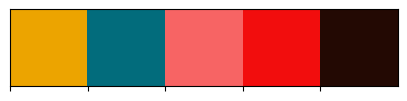

In [18]:
# Creating a palette
palette = sns.color_palette(['#ECA400','#026c7c', '#f76464', '#f20d0d', '#230903'])
sns.palplot(palette)
sns.set_palette(['#ECA400','#026c7c', '#f76464', '#f20d0d', '#230903'])

In [19]:
df.head()

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0   Yes           24.00           219.0                  22.0   
1   Yes           16.99            10.0                  17.0   
2    No           38.00             8.0                  38.0   
3    No           82.28          1312.0                  75.0   
4   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
0               -19.0           0.7  ...                          0   
1                 0.0           0.3  ...                          0   
2                 0.0           0.0  ...                          0   
3                 8.1          52.0  ...                          0   
4                -0.2           0.0  ...                          0   

   IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0            4              No                          0            30   
1            5              No                          0            30   
2            6              No                          0       Unknown   
3            6              No                          0            10   
4            9              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 56 columns]

In [20]:
# Churn is the target, need to be transformed in a binary value. 
# Replace 'Yes' with 1 and 'No' with 0 in the 'Churn' column
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

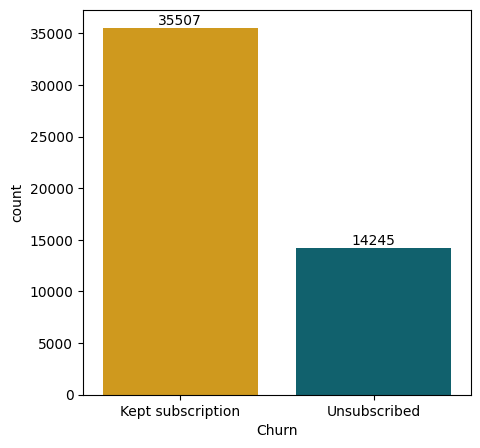

In [21]:
# Visualising the target
plt.style.use('default')
plt.figure(figsize=(5,5))   
ax = sns.countplot(data=df, x=df['Churn'], palette=palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(['Kept subscription','Unsubscribed'])
plt.show()

In [22]:
# Calculating churn rate
unsubscribed = 14245
churn_rate = (unsubscribed / len(df_cell2cell)) * 100
rounded_churn_rate = round(churn_rate, 2)
print('Churn rate:', rounded_churn_rate)

Churn rate: 28.63


FEATURES ANALYSIS

Feature analysis: 'MonthlyRevenue'<br/>
Found 2 neagtive values, those entries were dropped.<br/>
We have a pick of churning around MonthlyRevenue=30-40, investigate the offers and plans.<br/>
Customers who pay more are churning in proportion.<br/>


In [23]:
# MonthlyRevenue
print(type(df['MonthlyRevenue']))
print(df['MonthlyRevenue'].dtype)
print('Mean:', (df['MonthlyRevenue'].mean()))
print('Min:', (df['MonthlyRevenue'].min()))
print('Max:', (df['MonthlyRevenue'].max()))
#df['MonthlyRevenue']


<class 'pandas.core.series.Series'>
float64
Mean: 58.71737377391863
Min: -6.17
Max: 1223.38


In [24]:
# Filter out negative values
negative_values = df[df['MonthlyRevenue'] < 0]

# Count the number of negative values
negative_count = len(negative_values)

# Print the count of negative values
print("Number of negative values in the column:", negative_count)
print(negative_values)

Number of negative values in the column: 2
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
33352      0           -5.86             0.0                  -5.0   
48038      0           -6.17             0.0                  -6.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
33352                    0.0             0.0           0.0                0.0   
48038                    0.0             0.0           0.0                0.0   

       PercChangeRevenues  DroppedCalls  ...  ReferralsMadeBySubscriber  \
33352                 5.9           0.0  ...                          0   
48038                 6.2           0.0  ...                          0   

       IncomeGroup  OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
33352            6              No                          0       Unknown   
48038            6              No                          0       Unknown   

       MadeCallToRetentionTeam  Credit

In [25]:
# Filter out rows with negative values in the column
df_no_negative = df[df['MonthlyRevenue'] >= 0]

# Print the number of rows before and after dropping negative values
print("Number of rows before dropping:", len(df))
print("Number of rows after dropping negative values:", len(df_no_negative))

Number of rows before dropping: 49752
Number of rows after dropping negative values: 49750


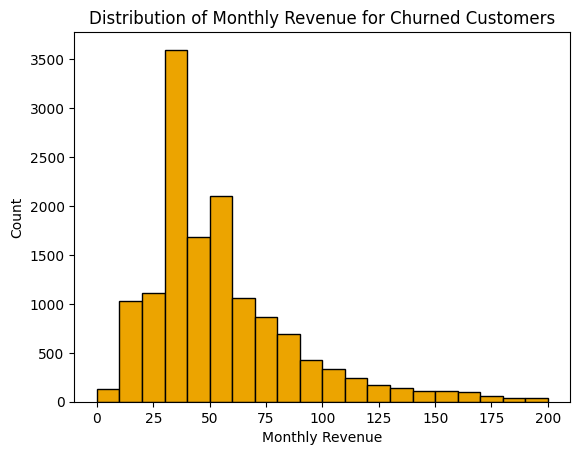

In [26]:
# Filter the dataframe for churned customers
churned_customers = df[df['Churn'] == 1]

# Define the intervals for MonthlyMinutes
bins = range(0, 200 + 10, 10)

# Plot the histogram
plt.hist(churned_customers['MonthlyRevenue'], bins=bins, edgecolor='black', color='#ECA400')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.title('Distribution of Monthly Revenue for Churned Customers')
plt.show()

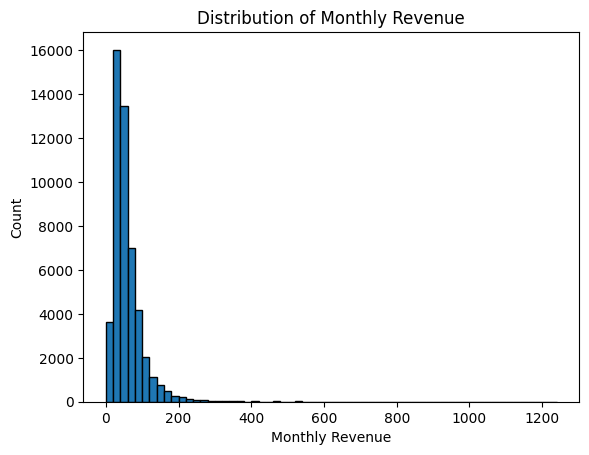

In [27]:
# Set the bin size
bin_size = 20

# Plot the histogram
plt.hist(df['MonthlyRevenue'], bins=range(0, int(df['MonthlyRevenue'].max()) + bin_size, bin_size), edgecolor='black')
plt.xlabel('Monthly Revenue')
plt.ylabel('Count')
plt.title('Distribution of Monthly Revenue')
plt.show()

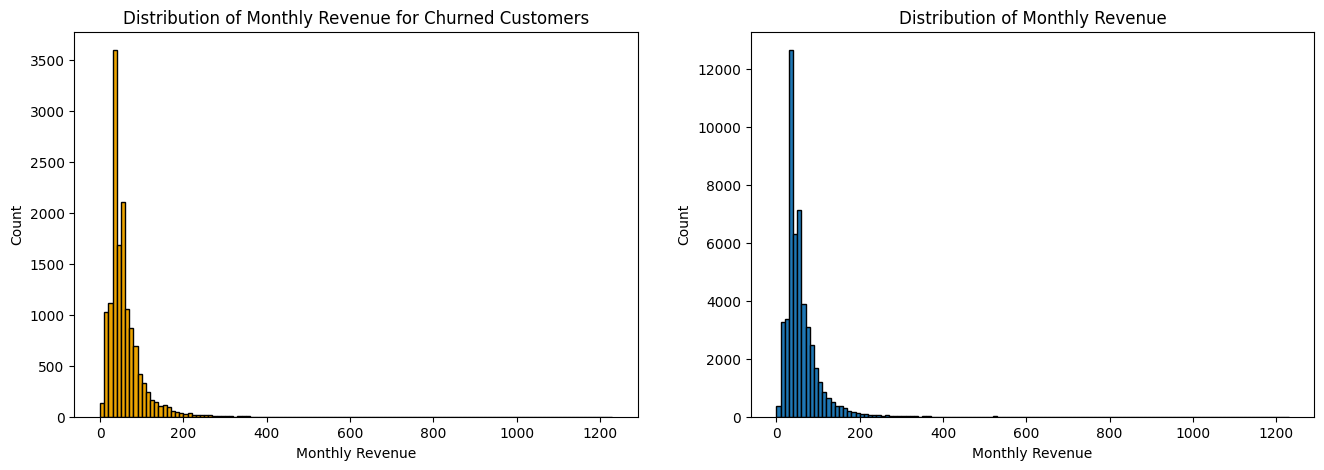

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

# Define the intervals for MonthlyRevenue
bins = range(0, int(df['MonthlyRevenue'].max()) + 10, 10)

# Plot the histogram for churned customers
ax[0].hist(churned_customers['MonthlyRevenue'], bins=bins, edgecolor='black', color='#ECA400')
ax[0].set_xlabel('Monthly Revenue')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Monthly Revenue for Churned Customers')

# Plot the histogram for all customers
ax[1].hist(df['MonthlyRevenue'], bins=bins, edgecolor='black')
ax[1].set_xlabel('Monthly Revenue')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Monthly Revenue')

plt.show()

Feature analysis: 'MonthlyMinutes'

In [29]:
# MonthlyMinutes
print(type(df['MonthlyMinutes']))
print(df['MonthlyMinutes'].dtype)
print('Mean:', (df['MonthlyMinutes'].mean()))
print('Min:', (df['MonthlyMinutes'].min()))
print('Max:', (df['MonthlyMinutes'].max()))

<class 'pandas.core.series.Series'>
float64
Mean: 525.0214664737096
Min: 0.0
Max: 7359.0


In [30]:
zero_count = (df['MonthlyMinutes'] == 0).sum()
print("Number of values equal to 0 in 'MonthlyMinutes' column:", zero_count)

Number of values equal to 0 in 'MonthlyMinutes' column: 671


In [31]:
# Calculate the total number of values in the 'MonthlyMinutes' column
total_values = len(df['MonthlyMinutes'])

# Count the number of values equal to 0 in the 'MonthlyMinutes' column
zero_count = (df['MonthlyMinutes'] == 0).sum()

# Calculate the percentage of values equal to 0
zero_percentage = (zero_count / total_values) * 100

print("Percentage of values equal to 0 in 'MonthlyMinutes' column:", zero_percentage)

Percentage of values equal to 0 in 'MonthlyMinutes' column: 1.348689499919601


In [32]:
zero_minutes_by_churn = df[df['MonthlyMinutes'] == 0].groupby('Churn').size()
print(zero_minutes_by_churn)

Churn
0    268
1    403
dtype: int64


In [33]:
unsubscribed_not_using_percentage= (403 *100)/unsubscribed
print('Percentage of churned people who didnt use minutes:',unsubscribed_not_using_percentage)


Percentage of churned people who didnt use minutes: 2.829062829062829


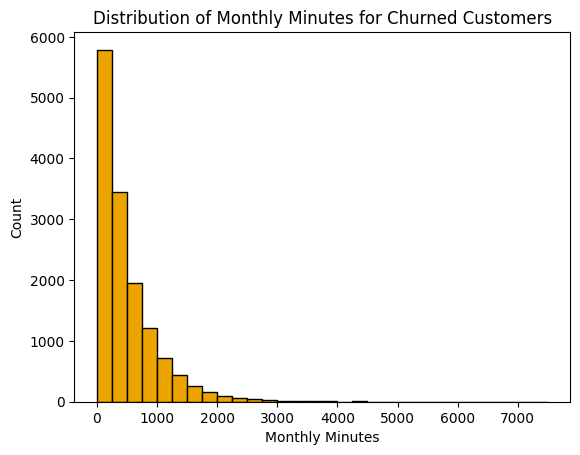

In [34]:
# Filter the dataframe for churned customers
churned_customers = df[df['Churn'] == 1]

# Define the intervals for MonthlyMinutes
bins = range(0, int(df['MonthlyMinutes'].max()) + 250, 250)

# Plot the histogram
plt.hist(churned_customers['MonthlyMinutes'], bins=bins, edgecolor='black', color='#ECA400')
plt.xlabel('Monthly Minutes')
plt.ylabel('Count')
plt.title('Distribution of Monthly Minutes for Churned Customers')
plt.show()

Feature analysis: 'TotalRecurringCharge'

In [35]:
# TotalRecurringCharge
print(type(df['TotalRecurringCharge']))
print(df['TotalRecurringCharge'].dtype)
print('Mean:', (df['TotalRecurringCharge'].mean()))
print('Min:', (df['TotalRecurringCharge'].min()))
print('Max:', (df['TotalRecurringCharge'].max()))

<class 'pandas.core.series.Series'>
float64
Mean: 46.83496140858659
Min: -6.0
Max: 400.0


In [36]:
# Filter out negative values
negative_values = df[df['TotalRecurringCharge'] < 0]

# Count the number of negative values
negative_count = len(negative_values)

# Print the count of negative values
print("Number of negative values in the column:", negative_count)
print(negative_values)

Number of negative values in the column: 5
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
3605       0           21.94           329.0                  -2.0   
23904      1           94.77           908.0                  -6.0   
33352      0           -5.86             0.0                  -5.0   
35304      0            3.56           157.0                  -1.0   
48038      0           -6.17             0.0                  -6.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
3605                    0.00            44.0           6.6             -329.0   
23904                   4.95             4.0           0.0             -908.0   
33352                   0.00             0.0           0.0                0.0   
35304                   0.00             7.0           0.6             -157.0   
48038                   0.00             0.0           0.0                0.0   

       PercChangeRevenues  DroppedCalls  ...  Ref

In [37]:
# Alternative method:
df_no_negative = df[df['TotalRecurringCharge'] >= 0]  # Replace 'column_name' with the actual column name

# Print the number of rows before and after dropping negative values
print("Number of rows before dropping:", len(df))
print("Number of rows after dropping negative values:", len(df_no_negative))

Number of rows before dropping: 49752
Number of rows after dropping negative values: 49747


In [38]:
# TotalRecurringCharge
print(type(df['DirectorAssistedCalls']))
print(df['DirectorAssistedCalls'].dtype)
print('Mean:', (df['DirectorAssistedCalls'].mean()))
print('Min:', (df['DirectorAssistedCalls'].min()))
print('Max:', (df['DirectorAssistedCalls'].max()))

<class 'pandas.core.series.Series'>
float64
Mean: 0.8918407300209037
Min: 0.0
Max: 159.39


In [39]:
zero_count = (df['DirectorAssistedCalls'] == 0).sum()
print("Number of values equal to 0 in 'DirectorAssistedCalls' column:", zero_count)

Number of values equal to 0 in 'DirectorAssistedCalls' column: 23955


In [40]:
outliers = (df['DirectorAssistedCalls'] >6).sum()
print('Numbers of customers using director assisted called more than 9 times:', outliers)

Numbers of customers using director assisted called more than 9 times: 1256


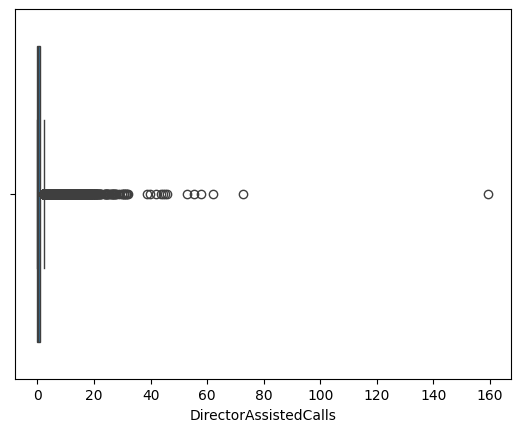

In [41]:
sns.boxplot(data=df, x=df['DirectorAssistedCalls'])
plt.show()

In [42]:
# Calculate quartiles
Q1 = df['DirectorAssistedCalls'].quantile(0.25)
Q3 = df['DirectorAssistedCalls'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['DirectorAssistedCalls'] < lower_bound) | (df['DirectorAssistedCalls'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

0
2.4749999999999996
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
7          0           62.13            98.0                  66.0   
45         0          163.54          1438.0                  83.0   
46         0           66.28          1230.0                  60.0   
50         0          196.76          3479.0                  85.0   
51         0           79.44           831.0                  75.0   
...      ...             ...             ...                   ...   
50951      0           61.71           372.0                  35.0   
50952      0           83.44           602.0                  50.0   
50983      1          534.93          4719.0                  10.0   
51003      0          130.55          2437.0                  75.0   
51020      0          109.50           603.0                  43.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
7                       2.48             0.0   

In [43]:
outliers_by_churn = outliers.groupby('Churn').size()
print(outliers_by_churn)



Churn
0    3957
1    1421
dtype: int64


In [44]:
df['DirectorAssistedCalls'].describe()

count    49752.000000
mean         0.891841
std          2.224725
min          0.000000
25%          0.000000
50%          0.250000
75%          0.990000
max        159.390000
Name: DirectorAssistedCalls, dtype: float64

In [45]:
df['OverageMinutes'].describe()

count    49752.000000
mean        39.754040
std         96.091606
min          0.000000
25%          0.000000
50%          3.000000
75%         40.000000
max       4321.000000
Name: OverageMinutes, dtype: float64

In [46]:
# Calculate quartiles
Q1 = df['OverageMinutes'].quantile(0.25)
Q3 = df['OverageMinutes'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
#upper_bound = Q3 + 1.5 * IQR
upper_bound = 100

# Identify outliers
outliers = df[(df['OverageMinutes'] < lower_bound) | (df['OverageMinutes'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

0
100
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
11         0          212.51          1972.0                  85.0   
15         1          172.44          1978.0                 100.0   
26         0           82.16           660.0                  50.0   
31         1          107.23           782.0                  25.0   
33         0          145.79          1293.0                  68.0   
...      ...             ...             ...                   ...   
50957      0          132.60          1112.0                 100.0   
50959      0          122.00           765.0                  50.0   
50983      1          534.93          4719.0                  10.0   
51003      0          130.55          2437.0                  75.0   
51041      1          117.49           384.0                  30.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
11                      2.23           250.0          35.5    

In [47]:
outliears_by_churn = outliers.groupby('Churn').size()
print(outliears_by_churn)

Churn
0    3972
1    1831
dtype: int64


In [48]:
unsubscribed_not_using_percentage= (1831 *100)/unsubscribed
print('Percentage of churned people who has high overage:',unsubscribed_not_using_percentage)


Percentage of churned people who has high overage: 12.853632853632854


In [49]:
df['RoamingCalls'].describe()

count    49752.000000
mean         1.226327
std          9.848360
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max       1112.400000
Name: RoamingCalls, dtype: float64

In [50]:
#Calculate quartiles
Q1 = df['RoamingCalls'].quantile(0.25)
Q3 = df['RoamingCalls'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound1 = 0
#upper_bound = Q3 + 1.5 * IQR
upper_bound1 = 100

# Identify outliers
outliers = df[(df['RoamingCalls'] < lower_bound1) | (df['RoamingCalls'] > upper_bound1)]

# Print outliers
print(lower_bound1)
print(upper_bound1)
print("Outliers:")
print(outliers)

0
100
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
1242       0          479.09          2411.0                 160.0   
3081       1          175.70           491.0                  60.0   
3275       0          529.12          2742.0                  85.0   
5488       0          526.99          1912.0                  85.0   
6554       0          535.96          2942.0                 227.0   
7618       1          855.50          4034.0                 100.0   
8156       1          201.74           782.0                  70.0   
13678      0          273.97          1422.0                  70.0   
15586      1          164.50           511.0                  60.0   
19586      1          242.48           774.0                  80.0   
21287      0          411.90          1272.0                  75.0   
21877      1          221.84          1039.0                  50.0   
22736      0          222.61          1230.0                  50.0   
2307

In [51]:
outliers_by_churn = outliers.groupby('Churn').size()
print(outliers_by_churn)

Churn
0    22
1    14
dtype: int64


In [52]:
# Drop outliers from the DataFrame
df_cleaned = df_no_negative.drop(outliers.index)

# Print the number of rows before and after dropping negative values
print("Number of rows before dropping:", len(df_no_negative))
print("Number of rows after dropping negative values:", len(df_cleaned))

Number of rows before dropping: 49747
Number of rows after dropping negative values: 49711


Percentage Change Minutes and percentage Change Revenue<br/>
When we calculate percentage change, we are calculating by what percentage of its original value something has changed.
To do this we use the percentage change formula:<br/>
 Percentage change = (Change=(Final Value - Initial Value/Original)*100


In [53]:
df['PercChangeMinutes'].describe()

count    49752.000000
mean       -11.656175
std        255.858193
min      -3875.000000
25%        -83.000000
50%         -5.000000
75%         65.000000
max       5192.000000
Name: PercChangeMinutes, dtype: float64

In [54]:
# Lets calcultae the churn rate of customers who have decreased minutes
decrease_use =df[df['PercChangeMinutes'] < 0]

In [55]:
decrease_use_by_churn = decrease_use.groupby('Churn').size()
print(decrease_use_by_churn)
print(len(decrease_use))
print(len(decrease_use[df['Churn'] == 1]))

Churn
0    18363
1     7961
dtype: int64
26324
7961


In [56]:
PercChangeMinutes_churnrate = ((len(decrease_use)-len(decrease_use[df['Churn'] == 1]))/len(decrease_use))*100
print(PercChangeMinutes_churnrate)
print((7961/unsubscribed)*100)

69.75763561768728
55.88627588627588


In [57]:
df['PercChangeRevenues'].describe()

count    49752.000000
mean        -1.175937
std         39.392124
min      -1107.700000
25%         -7.000000
50%         -0.300000
75%          1.600000
max       2483.500000
Name: PercChangeRevenues, dtype: float64

In [58]:
# Lets calculate increase revenue churn rate
# Lets calcultae the churn rate of customers who have decreased minutes
increase_revenue =df[df['PercChangeRevenues'] > 0]

In [59]:
increase_revenue_by_churn = increase_revenue.groupby('Churn').size()
print(increase_revenue_by_churn)
print(len(increase_revenue))
print(len(increase_revenue[df['Churn'] == 1]))

Churn
0    11594
1     4555
dtype: int64
16149
4555


Dropped calls

In [60]:
df['DroppedCalls'].describe()

count    49752.000000
mean         6.010556
std          9.036653
min          0.000000
25%          0.700000
50%          3.000000
75%          7.700000
max        221.700000
Name: DroppedCalls, dtype: float64

In [61]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['BlockedCalls'].quantile(0.25)
Q3 = df['BlockedCalls'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['BlockedCalls'] < lower_bound) | (df['BlockedCalls'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

0
9.25
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
15         1          172.44          1978.0                 100.0   
33         0          145.79          1293.0                  68.0   
34         1           50.56           100.0                  50.0   
41         1          149.99          2382.0                 150.0   
42         0           84.91           745.0                  85.0   
...      ...             ...             ...                   ...   
50619      0           74.99           936.0                  87.0   
50762      0          139.19          1180.0                  55.0   
50857      1           79.52           821.0                  70.0   
50982      1           42.98          1282.0                  45.0   
50995      0           30.61          1344.0                  40.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
15                      0.00           362.0           0.0   

In [62]:
BlockCalls_by_churn = df[df['BlockedCalls']>9].groupby('Churn').size()
print(BlockCalls_by_churn)


Churn
0    3856
1    1520
dtype: int64


In [63]:
df['UnansweredCalls'].describe()

count    49752.000000
mean        28.290957
std         38.860429
min          0.000000
25%          5.300000
50%         16.300000
75%         36.300000
max        848.700000
Name: UnansweredCalls, dtype: float64

In [64]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['UnansweredCalls'].quantile(0.25)
Q3 = df['UnansweredCalls'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['UnansweredCalls'] < lower_bound) | (df['UnansweredCalls'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

0
82.79999999999998
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
15         1          172.44          1978.0                 100.0   
41         1          149.99          2382.0                 150.0   
45         0          163.54          1438.0                  83.0   
50         0          196.76          3479.0                  85.0   
77         0          281.33          3808.0                 183.0   
...      ...             ...             ...                   ...   
50907      0          129.33          1357.0                  85.0   
50995      0           30.61          1344.0                  40.0   
51002      0           64.11          1893.0                  70.0   
51003      0          130.55          2437.0                  75.0   
51020      0          109.50           603.0                  43.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
15                      0.00           362.0    

In [65]:
UnansweredCalls_by_churn = df_cleaned[(df['UnansweredCalls'] < lower_bound) | (df['UnansweredCalls'] > upper_bound)].groupby('Churn').size()
print(UnansweredCalls_by_churn)
print(len(outliers))


Churn
0    2626
1     896
dtype: int64
3528


In [66]:
UnasweredCalls_churnrate = (896/3528)*100
print(UnasweredCalls_churnrate)
print((896/unsubscribed)*100)

25.396825396825395
6.2899262899262895


Customer Care Calls<br/>
This feature could be interesting because it gives info on the interaction of <br/>the customers with the company

In [67]:
df_cleaned['CustomerCareCalls'].describe()

count    49711.000000
mean         1.872580
std          5.110399
min          0.000000
25%          0.000000
50%          0.000000
75%          1.700000
max        327.300000
Name: CustomerCareCalls, dtype: float64

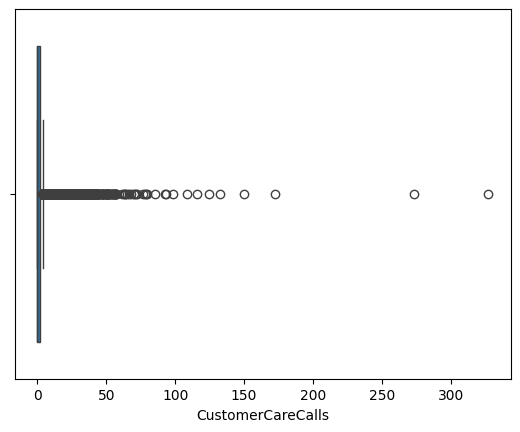

In [68]:
sns.boxplot(data=df_cleaned, x=df_cleaned['CustomerCareCalls'])
plt.show()

In [69]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['CustomerCareCalls'].quantile(0.25)
Q3 = df['CustomerCareCalls'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['CustomerCareCalls'] < lower_bound) | (df['CustomerCareCalls'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

0
4.25
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
3          0           82.28          1312.0                  75.0   
29         1           57.98           684.0                  55.0   
41         1          149.99          2382.0                 150.0   
46         0           66.28          1230.0                  60.0   
56         0           49.99           820.0                  60.0   
...      ...             ...             ...                   ...   
50982      1           42.98          1282.0                  45.0   
50995      0           30.61          1344.0                  40.0   
51002      0           64.11          1893.0                  70.0   
51003      0          130.55          2437.0                  75.0   
51020      0          109.50           603.0                  43.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
3                       1.24             0.0           0.0   

In [70]:
Customercarecalls_by_churn = df[(df['CustomerCareCalls'] < lower_bound) | (df['CustomerCareCalls'] > upper_bound)].groupby('Churn').size()
print(Customercarecalls_by_churn)
print(len(outliers))


Churn
0    4926
1    1645
dtype: int64
6571


In [71]:
print((1645/4926)*100)

33.394234673162806


In [72]:
df['UniqueSubs'].describe()


count    49752.000000
mean         1.529004
std          1.225841
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        196.000000
Name: UniqueSubs, dtype: float64

In [73]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['UniqueSubs'].quantile(0.25)
Q3 = df['UniqueSubs'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['UniqueSubs'] < lower_bound) | (df['UniqueSubs'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

0
3.5
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
11         0          212.51          1972.0                  85.0   
30         1           78.29           852.0                  85.0   
61         0          114.13          1650.0                  83.0   
65         0           95.17           161.0                  89.0   
66         1           90.61          1151.0                  95.0   
...      ...             ...             ...                   ...   
50542      1           30.00           130.0                  30.0   
50547      0           27.74           148.0                  32.0   
50583      0           51.15           209.0                  50.0   
50584      0           69.04           974.0                  60.0   
50733      1           87.49             0.0                  97.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
11                      2.23           250.0          35.5    

In [74]:
UniqueSubs_by_churn = df[(df['UniqueSubs'] < lower_bound) | (df['UniqueSubs'] > upper_bound)].groupby('Churn').size()
print(UniqueSubs_by_churn)
print(len(outliers))
print()


Churn
0    1204
1     583
dtype: int64
1787



In [75]:
# CREATING A DATAFRAME ONLY WITH THE OUTLIERS
outliers_df = df.loc[outliers.index]

# Group outliers DataFrame by the 'Churn' column
outliers_by_churn = outliers_df.groupby('Churn')

#Calculate churn rate in the outliers
churn_rate_outliers = (len(outliers_df[outliers_df['Churn']==1])/len(outliers))*100
churn_rate_customers = (len(outliers_df[outliers_df['Churn']==1])/unsubscribed)*100

# Print the result
print(outliers_by_churn.size())
print('Churn rate in the outliers: {:.2f}%'.format(churn_rate_outliers))
print('Percentage of all the churned customers:{:.2f}%'.format(churn_rate_customers))

Churn
0    1204
1     583
dtype: int64
Churn rate in the outliers: 32.62%
Percentage of all the churned customers:4.09%


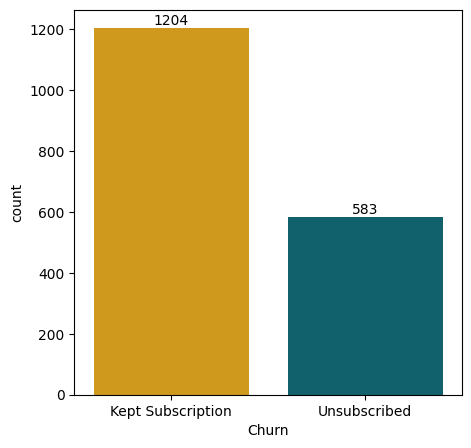

In [76]:
plt.figure(figsize=(5,5))   
ax = sns.countplot(data=outliers_df, x=outliers_df['Churn'], palette=palette)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(['Kept Subscription','Unsubscribed'])
plt.show()

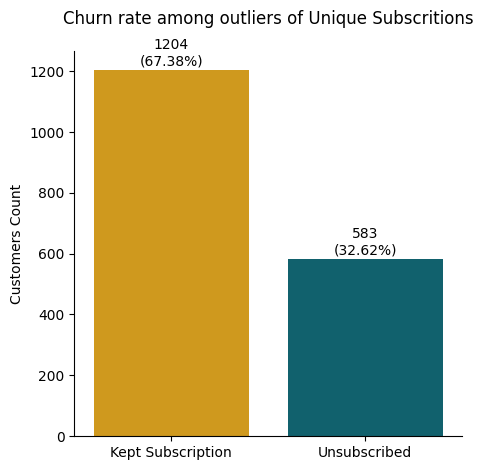

In [77]:

plt.figure(figsize=(5,5))   
ax = sns.countplot(data=outliers_df, x='Churn', palette=palette)

# Calculate the total number of samples
total_samples = len(outliers_df)

# Calculate the percentage of each category
# Calculate the count and percentage of each category
for p in ax.patches:
    count = int(p.get_height())
    percentage = '{:.2f}%'.format(100 * count/total_samples)
    ax.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 12), textcoords='offset points')

ax.set_xticklabels(['Kept Subscription','Unsubscribed'])
ax.set_title('Churn rate among outliers of Unique Subscritions', y=1.05)
ax.set_xlabel('')
ax.set_ylabel('Customers Count')
# Remove top and right spines
sns.despine()
plt.show()

In [78]:
# Mark rows in outliers_df as outliers
outliers_df['Outlier'] = True

# Merge the two DataFrames
merged_df = pd.merge(df[df['Churn']==1], outliers_df[outliers_df['Churn']==1], how='outer')

# Fill NaN values in the 'Outlier' column with False
merged_df['Outlier'] = merged_df['Outlier'].fillna(False)


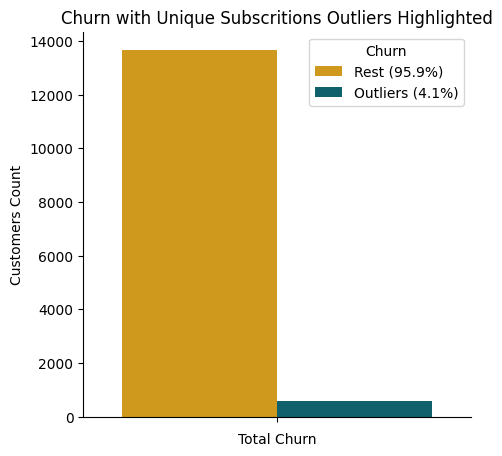

In [79]:
# Calculate the percentage of outliers
total_count = len(merged_df)
outlier_count = merged_df['Outlier'].sum()
percentage_outliers = (outlier_count / total_count) * 100

# Calculate the percentage of outliers
total_count = len(merged_df)
outlier_count = merged_df['Outlier'].sum()
percentage_outliers = (outlier_count / total_count) * 100

# Plot the count of Churn with outliers highlighted
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=merged_df, x='Churn', hue='Outlier', palette=palette)
ax.set_xticklabels('')
ax.set_xlabel('Total Churn')
ax.set_ylabel('Customers Count')

# Add percentages above bars
# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{height / total_count:.1%}', ha='center')

# Add legend with customized title
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=[f'Rest ({100 - percentage_outliers:.1f}%)', f'Outliers ({percentage_outliers:.1f}%)'], title='Churn')

# Add title
plt.title('Churn with Unique Subscritions Outliers Highlighted')
sns.despine()
# Show plot
plt.show()

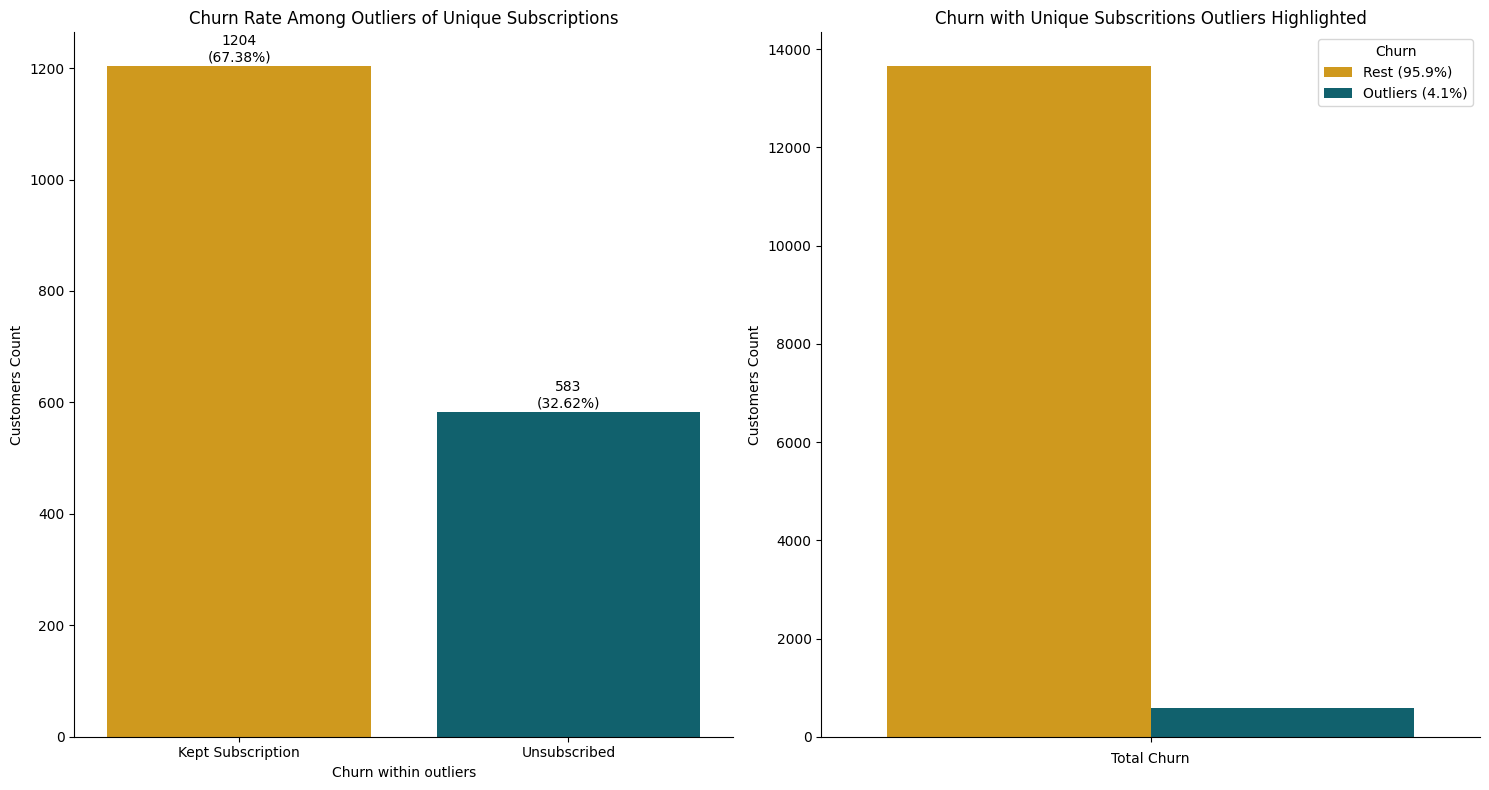

In [80]:
plt.figure(figsize=(15, 8))

# Plot the count of churn among outliers
plt.subplot(1, 2, 1)
ax2 = sns.countplot(data=outliers_df, x='Churn', palette=palette)

# Calculate the total number of samples
total_samples = len(outliers_df)

# Calculate the percentage of each category
for p in ax2.patches:
    count = int(p.get_height())
    percentage = '{:.2f}%'.format(100 * count / total_samples)
    ax2.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 12), textcoords='offset points')

# Set labels and title
ax2.set_xticklabels(['Kept Subscription', 'Unsubscribed'])
ax2.set_title('Churn Rate Among Outliers of Unique Subscriptions')
ax2.set_xlabel('Churn within outliers')
ax2.set_ylabel('Customers Count')

# Remove top and right spines
sns.despine()

# Plot the count of Churn with outliers highlighted
plt.subplot(1, 2, 2)
ax1 = sns.countplot(data=merged_df, x='Churn', hue='Outlier', palette=palette)
ax1.set_xticklabels('')
ax1.set_xlabel('Total Churn')
ax1.set_ylabel('Customers Count')

# Calculate the percentage of outliers
total_count = len(merged_df)
outlier_count = merged_df['Outlier'].sum()
percentage_outliers = (outlier_count / total_count) * 100

# # Add percentages above bars
# for p in ax1.patches:
#     height = p.get_height()
#     ax1.text(p.get_x() + p.get_width() / 2., height + 1, f'{height / total_count:.1%}', ha='center')

# Add legend with customized title
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles=handles1, labels=[f'Rest ({100 - percentage_outliers:.1f}%)', f'Outliers ({percentage_outliers:.1f}%)'], title='Churn')
ax1.set_title('Churn with Unique Subscritions Outliers Highlighted')
sns.despine()

plt.tight_layout()

UNIQUE SUBSCRIPTIONS AND ACTIVE SUBSCRIPTIONS<br/>

Telephone subscriber means “a person or entity to whom exchange telephone service, either residential or commercial, is provided and in return for which the person or entity is billed on a monthly basis. When the same person, business, or organization has several telephone access lines, each exchange access facility constitutes a separate subscription”(UNIQUE SUBSCRIPTIONS)

Active telephone subscriptions' refers to the total number of Smartphones, ATMs, PoS, and other communication gadgets that use SIM Cards whereas the ‘active telephone subscribers’ refer to the total number of individuals who are registered users of SIM Cards. For example a bank could have 3,000 ATMs with each of them infused with two SIM Cards. Invariably, the ATMs account for 6,000 active telephone subscriptions.

In [81]:
df['ActiveSubs'].describe()

count    49752.000000
mean         1.350860
std          0.667839
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         53.000000
Name: ActiveSubs, dtype: float64

In [82]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['ActiveSubs'].quantile(0.25)
Q3 = df['ActiveSubs'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['ActiveSubs'] < lower_bound) | (df['ActiveSubs'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers count:", len(outliers))
print(outliers)

0
3.5
Outliers count: 561
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
30         1           78.29           852.0                  85.0   
61         0          114.13          1650.0                  83.0   
65         0           95.17           161.0                  89.0   
121        1           85.58           890.0                  75.0   
134        0           94.99          1204.0                  85.0   
...      ...             ...             ...                   ...   
50502      0           81.81           627.0                  87.0   
50547      0           27.74           148.0                  32.0   
50583      0           51.15           209.0                  50.0   
50584      0           69.04           974.0                  60.0   
50733      1           87.49             0.0                  97.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
30                      0.00             0.0        

In [83]:
# CREATING A DATAFRAME ONLY WITH THE OUTLIERS
outliers_df = df.loc[outliers.index]

# Group outliers DataFrame by the 'Churn' column
outliers_by_churn = outliers_df.groupby('Churn')

#Calculate churn rate in the outliers
churn_rate_outliers = (len(outliers_df[outliers_df['Churn']==1])/len(outliers))*100
churn_rate_customers = (len(outliers_df[outliers_df['Churn']==1])/unsubscribed)*100

# Print the result
print('Total number of outliers:',len(outliers))
print(outliers_by_churn.size())
print('Churn rate in the outliers: {:.2f}%'.format(churn_rate_outliers))
print('Percentage of all the churned customers:{:.2f}%'.format(churn_rate_customers))

Total number of outliers: 561
Churn
0    425
1    136
dtype: int64
Churn rate in the outliers: 24.24%
Percentage of all the churned customers:0.95%


In [84]:
# Mark rows in outliers_df as outliers
outliers_df['Outlier'] = True

# Merge the two DataFrames
merged_df = pd.merge(df[df['Churn']==1], outliers_df[outliers_df['Churn']==1], how='outer')

# Fill NaN values in the 'Outlier' column with False
merged_df['Outlier'] = merged_df['Outlier'].fillna(False)


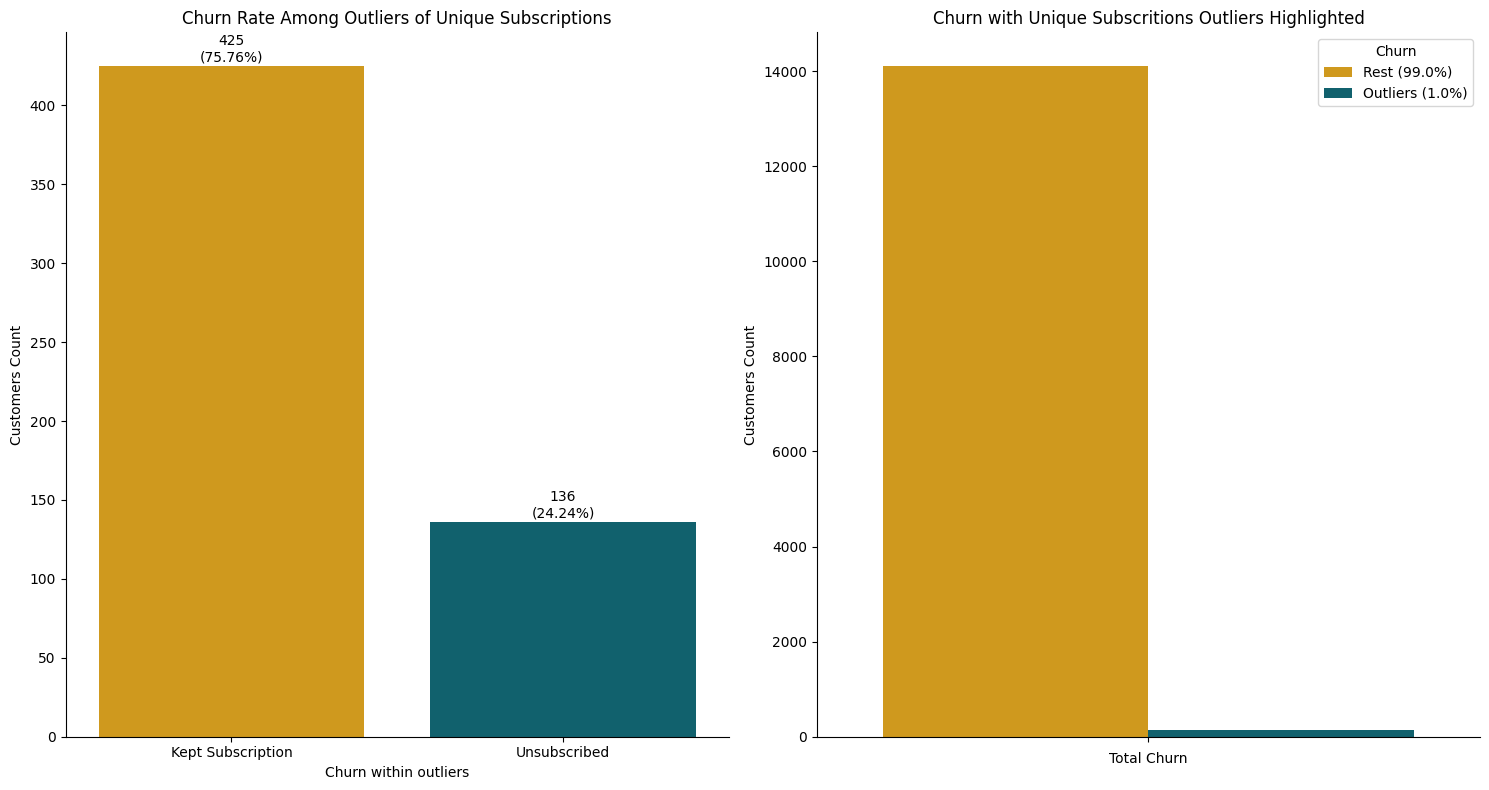

In [85]:
plt.figure(figsize=(15, 8))

# Plot the count of churn among outliers
plt.subplot(1, 2, 1)
ax2 = sns.countplot(data=outliers_df, x='Churn', palette=palette)

# Calculate the total number of samples
total_samples = len(outliers_df)

# Calculate the percentage of each category
for p in ax2.patches:
    count = int(p.get_height())
    percentage = '{:.2f}%'.format(100 * count / total_samples)
    ax2.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 12), textcoords='offset points')

# Set labels and title
ax2.set_xticklabels(['Kept Subscription', 'Unsubscribed'])
ax2.set_title('Churn Rate Among Outliers of Unique Subscriptions')
ax2.set_xlabel('Churn within outliers')
ax2.set_ylabel('Customers Count')

# Remove top and right spines
sns.despine()

# Plot the count of Churn with outliers highlighted
plt.subplot(1, 2, 2)
ax1 = sns.countplot(data=merged_df, x='Churn', hue='Outlier', palette=palette)
ax1.set_xticklabels('')
ax1.set_xlabel('Total Churn')
ax1.set_ylabel('Customers Count')

# Calculate the percentage of outliers
total_count = len(merged_df)
outlier_count = merged_df['Outlier'].sum()
percentage_outliers = (outlier_count / total_count) * 100

# # Add percentages above bars
# for p in ax1.patches:
#     height = p.get_height()
#     ax1.text(p.get_x() + p.get_width() / 2., height + 1, f'{height / total_count:.1%}', ha='center')

# Add legend with customized title
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles=handles1, labels=[f'Rest ({100 - percentage_outliers:.1f}%)', f'Outliers ({percentage_outliers:.1f}%)'], title='Churn')
ax1.set_title('Churn with Unique Subscritions Outliers Highlighted')
sns.despine()

plt.tight_layout()

Referral made by subscriber

In [86]:
df['ReferralsMadeBySubscriber'].describe()

count    49752.000000
mean         0.051475
std          0.266490
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: ReferralsMadeBySubscriber, dtype: float64

In [87]:
# Count how many zero referaals customers there are
print(df[df['ReferralsMadeBySubscriber'] == 0].shape[0])
print(df[df['ReferralsMadeBySubscriber'] == 1].shape[0])

47426
2190


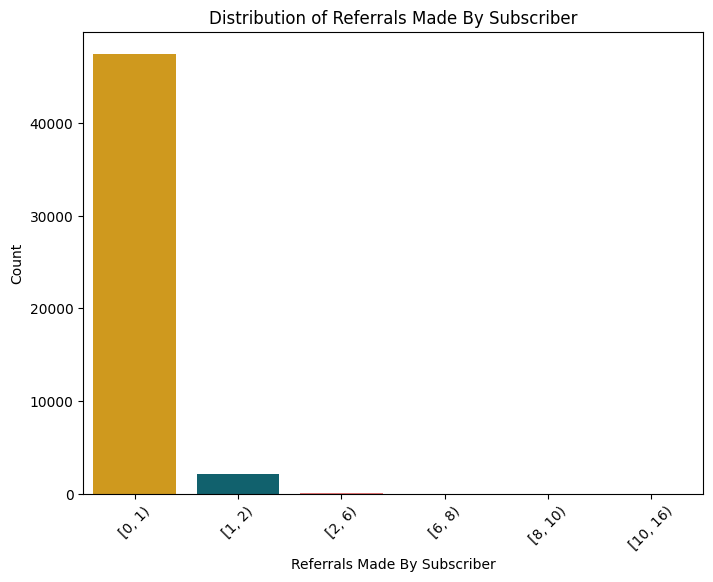

In [88]:
# Define custom bins
bins = [0, 1, 2, 6, 8, 10, 16]

# Create a new column with the bins
df['ReferralsBins'] = pd.cut(df['ReferralsMadeBySubscriber'], bins=bins, right=False)

# Plot the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ReferralsBins', palette=palette)
plt.xlabel('Referrals Made By Subscriber')
plt.ylabel('Count')
plt.title('Distribution of Referrals Made By Subscriber')
plt.xticks(rotation=45)
plt.show()

In [89]:
# Lets see how is the 'Churn' for df[ 'ReferralsMadeBySubscriber'] >=1
# Identify outliers
outliers = df[(df['ReferralsMadeBySubscriber'] >= 1)]

# Print outliers
print("Outliers count:", len(outliers))

Outliers count: 2326


In [90]:
# CREATING A DATAFRAME ONLY WITH THE OUTLIERS
outliers_df = df.loc[outliers.index]

# Group outliers DataFrame by the 'Churn' column
outliers_by_churn = outliers_df.groupby('Churn')

#Calculate churn rate in the outliers
churn_rate_outliers = (len(outliers_df[outliers_df['Churn']==1])/len(outliers))*100
churn_rate_customers = (len(outliers_df[outliers_df['Churn']==1])/unsubscribed)*100

# Print the result
print('Total number of outliers:',len(outliers))
print(outliers_by_churn.size())
print('Churn rate in the outliers: {:.2f}%'.format(churn_rate_outliers))
print('Percentage of all the churned customers:{:.2f}%'.format(churn_rate_customers))

Total number of outliers: 2326
Churn
0    1707
1     619
dtype: int64
Churn rate in the outliers: 26.61%
Percentage of all the churned customers:4.35%


Handsets, HandsetPrice, HandsetModels, CurrentEquipmentDays

In [91]:
df['Handsets'].describe()

count    49752.000000
mean         1.805093
std          1.330834
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         24.000000
Name: Handsets, dtype: float64

In [92]:
# Replacing unknown in handest price with mean
# Convert 'Unknown' to NaN
df['HandsetPrice'] = df['HandsetPrice'].replace('Unknown', np.nan)

# Convert the column to numeric type
df['HandsetPrice'] = pd.to_numeric(df['HandsetPrice'], errors='coerce')

# Calculate mean of non-null values
mean_handset_price = df['HandsetPrice'].mean()

# Convert mean to integer
mean_handset_price_int = int(mean_handset_price)

# Fill NaN with mean value as integer
df['HandsetPrice'] = df['HandsetPrice'].fillna(mean_handset_price_int)

In [93]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['Handsets'].quantile(0.25)
Q3 = df['Handsets'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Handsets'] < lower_bound) | (df['Handsets'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers count:", len(outliers))
print(outliers)

0
3.5
Outliers count: 4298
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
3          0           82.28          1312.0                  75.0   
4          1           17.14             0.0                  17.0   
8          0           35.30            24.0                  35.0   
9          0           81.00          1056.0                  75.0   
11         0          212.51          1972.0                  85.0   
...      ...             ...             ...                   ...   
51002      0           64.11          1893.0                  70.0   
51003      0          130.55          2437.0                  75.0   
51019      1           57.67           535.0                  45.0   
51020      0          109.50           603.0                  43.0   
51030      0           71.16           586.0                  45.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
3                       1.24             0.0       

In [94]:
# # Mark rows in outliers_df as outliers
# outliers_df['Outlier'] = True

# # Merge the two DataFrames
# merged_df = pd.merge(df[df['Churn']==1], outliers_df[outliers_df['Churn']==1], how='outer')

# # Fill NaN values in the 'Outlier' column with False
# merged_df['Outlier'] = merged_df['Outlier'].fillna(False)

Total number of outliers: 4298
Churn
0    3226
1    1072
dtype: int64
Churn rate in the outliers: 24.94%
Percentage of all the churned customers:7.53%


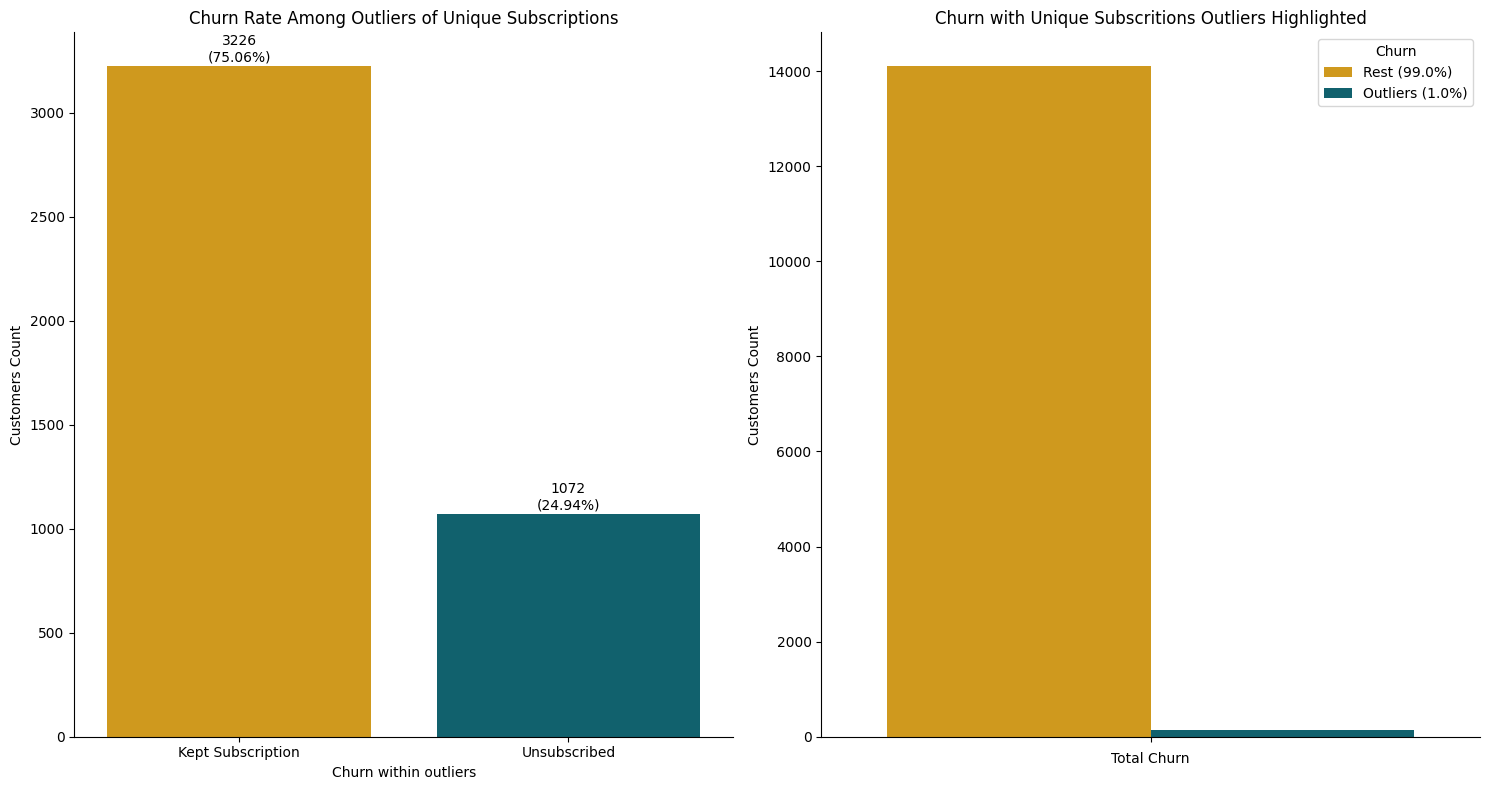

In [95]:
# CREATING A DATAFRAME ONLY WITH THE OUTLIERS
outliers_df = df.loc[outliers.index]

# Group outliers DataFrame by the 'Churn' column
outliers_by_churn = outliers_df.groupby('Churn')

#Calculate churn rate in the outliers
churn_rate_outliers = (len(outliers_df[outliers_df['Churn']==1])/len(outliers))*100
churn_rate_customers = (len(outliers_df[outliers_df['Churn']==1])/unsubscribed)*100
plt.figure(figsize=(15, 8))

# Plot the count of churn among outliers
plt.subplot(1, 2, 1)
ax2 = sns.countplot(data=outliers_df, x='Churn', palette=palette)

# Calculate the total number of samples
total_samples = len(outliers_df)

# Calculate the percentage of each category
for p in ax2.patches:
    count = int(p.get_height())
    percentage = '{:.2f}%'.format(100 * count / total_samples)
    ax2.annotate(f'{count}\n({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 12), textcoords='offset points')

# Set labels and title
ax2.set_xticklabels(['Kept Subscription', 'Unsubscribed'])
ax2.set_title('Churn Rate Among Outliers of Unique Subscriptions')
ax2.set_xlabel('Churn within outliers')
ax2.set_ylabel('Customers Count')

# Remove top and right spines
sns.despine()

# Plot the count of Churn with outliers highlighted
plt.subplot(1, 2, 2)
ax1 = sns.countplot(data=merged_df, x='Churn', hue='Outlier', palette=palette)
ax1.set_xticklabels('')
ax1.set_xlabel('Total Churn')
ax1.set_ylabel('Customers Count')

# Calculate the percentage of outliers
total_count = len(merged_df)
outlier_count = merged_df['Outlier'].sum()
percentage_outliers = (outlier_count / total_count) * 100

# # Add percentages above bars
# for p in ax1.patches:
#     height = p.get_height()
#     ax1.text(p.get_x() + p.get_width() / 2., height + 1, f'{height / total_count:.1%}', ha='center')

# Add legend with customized title
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles=handles1, labels=[f'Rest ({100 - percentage_outliers:.1f}%)', f'Outliers ({percentage_outliers:.1f}%)'], title='Churn')
ax1.set_title('Churn with Unique Subscritions Outliers Highlighted')
sns.despine()

plt.tight_layout()# Print the result
print('Total number of outliers:',len(outliers))
print(outliers_by_churn.size())
print('Churn rate in the outliers: {:.2f}%'.format(churn_rate_outliers))
print('Percentage of all the churned customers:{:.2f}%'.format(churn_rate_customers))

Analysing the leftover feature to decide if they are categoricaL, continuous or binary 'AdjustmentsToCreditRating', 'ReferralsMadeBySubscriber', 'ServiceArea', 'AgeHH1', 'AgeHH2'.<br/>


In [96]:
df['AdjustmentsToCreditRating'].describe()

count    49752.000000
mean         0.053686
std          0.382677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         25.000000
Name: AdjustmentsToCreditRating, dtype: float64

In [97]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['AdjustmentsToCreditRating'].quantile(0.25)
Q3 = df['AdjustmentsToCreditRating'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 1
upper_bound = 25

# Identify outliers
outliers = df[(df['AdjustmentsToCreditRating'] >=lower_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

1
25
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
4          1           17.14             0.0                  17.0   
5          0           38.05           682.0                  52.0   
6          0           31.66            26.0                  30.0   
9          0           81.00          1056.0                  75.0   
11         0          212.51          1972.0                  85.0   
...      ...             ...             ...                   ...   
50982      1           42.98          1282.0                  45.0   
50995      0           30.61          1344.0                  40.0   
51002      0           64.11          1893.0                  70.0   
51030      0           71.16           586.0                  45.0   
51043      0           95.17          1745.0                  85.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
4                       0.00             0.0           0.0     

In [98]:
# Service area was dropped because of the too many values and unknown encoding
# Analysing Age
# They seem continuous but we can
df['AgeHH1'].describe()

count    49752.000000
mean        31.338258
std         22.091593
min          0.000000
25%          0.000000
50%         36.000000
75%         48.000000
max         99.000000
Name: AgeHH1, dtype: float64

In [99]:
# FINDING OUTLIERS
# Calculate quartiles
Q1 = df['AgeHH1'].quantile(0.25)
Q3 = df['AgeHH1'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers detection
lower_bound = 2
upper_bound = 99

# Identify outliers
outliers = df[(df['AgeHH1'] < lower_bound) | (df['AgeHH1'] > upper_bound)]

# Print outliers
print(lower_bound)
print(upper_bound)
print("Outliers:")
print(outliers)

2
99
Outliers:
       Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
10         0           25.23             2.0                  25.0   
17         0           30.26            34.0                  30.0   
34         1           50.56           100.0                  50.0   
44         0          107.25          1671.0                  75.0   
48         1          136.42           560.0                  71.0   
...      ...             ...             ...                   ...   
50988      0           37.68           129.0                  35.0   
51020      0          109.50           603.0                  43.0   
51029      1           30.24            63.0                  30.0   
51031      1           33.63            28.0                  30.0   
51032      0           19.96            14.0                  17.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
10                      0.00             0.0           0.0     

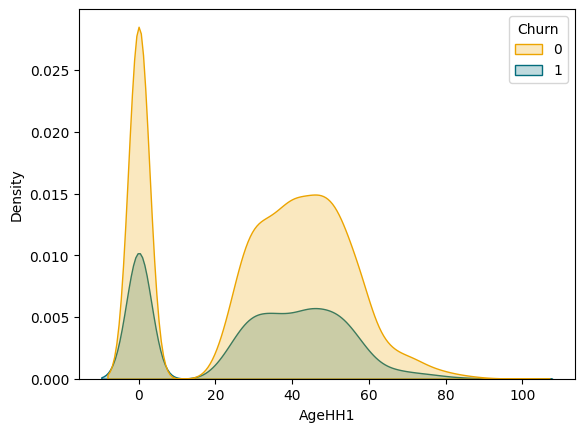

In [100]:
sns.kdeplot(data=df, x='AgeHH1', hue='Churn', shade=True, palette = palette)
plt.show()

In [101]:
df['AgeHH2'].describe()

count    49752.000000
mean        21.147592
std         23.926589
min          0.000000
25%          0.000000
50%          0.000000
75%         42.000000
max         99.000000
Name: AgeHH2, dtype: float64

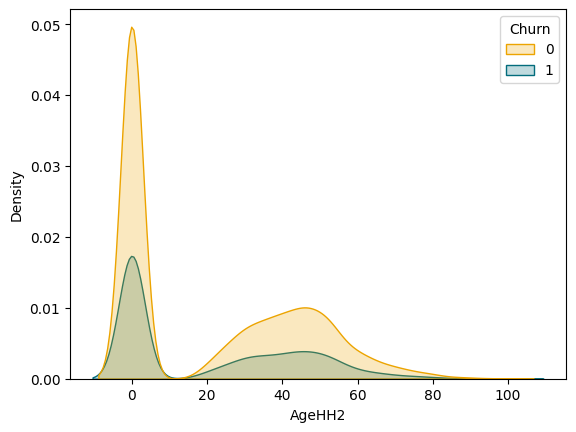

In [102]:
sns.kdeplot(data=df, x='AgeHH2', hue='Churn', shade=True, palette = palette)
plt.show()

Visualizing distribution of continuous features

In [103]:
# VISUALIZING DISTRIBUTION FOR CONTINUOUS COLUMNS
# for i in continuous_columns:
#     fig = plt.figure(figsize=(4,4))
#     sns.kdeplot(df, x=df[i], hue='Churn', shade=True, palette = palette )

In [104]:
print(len(continuous_columns))
print(continuous_columns)

32
['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'HandsetPrice', 'AdjustmentsToCreditRating', 'AgeHH1', 'AgeHH2', 'ReferralsMadeBySubscriber']


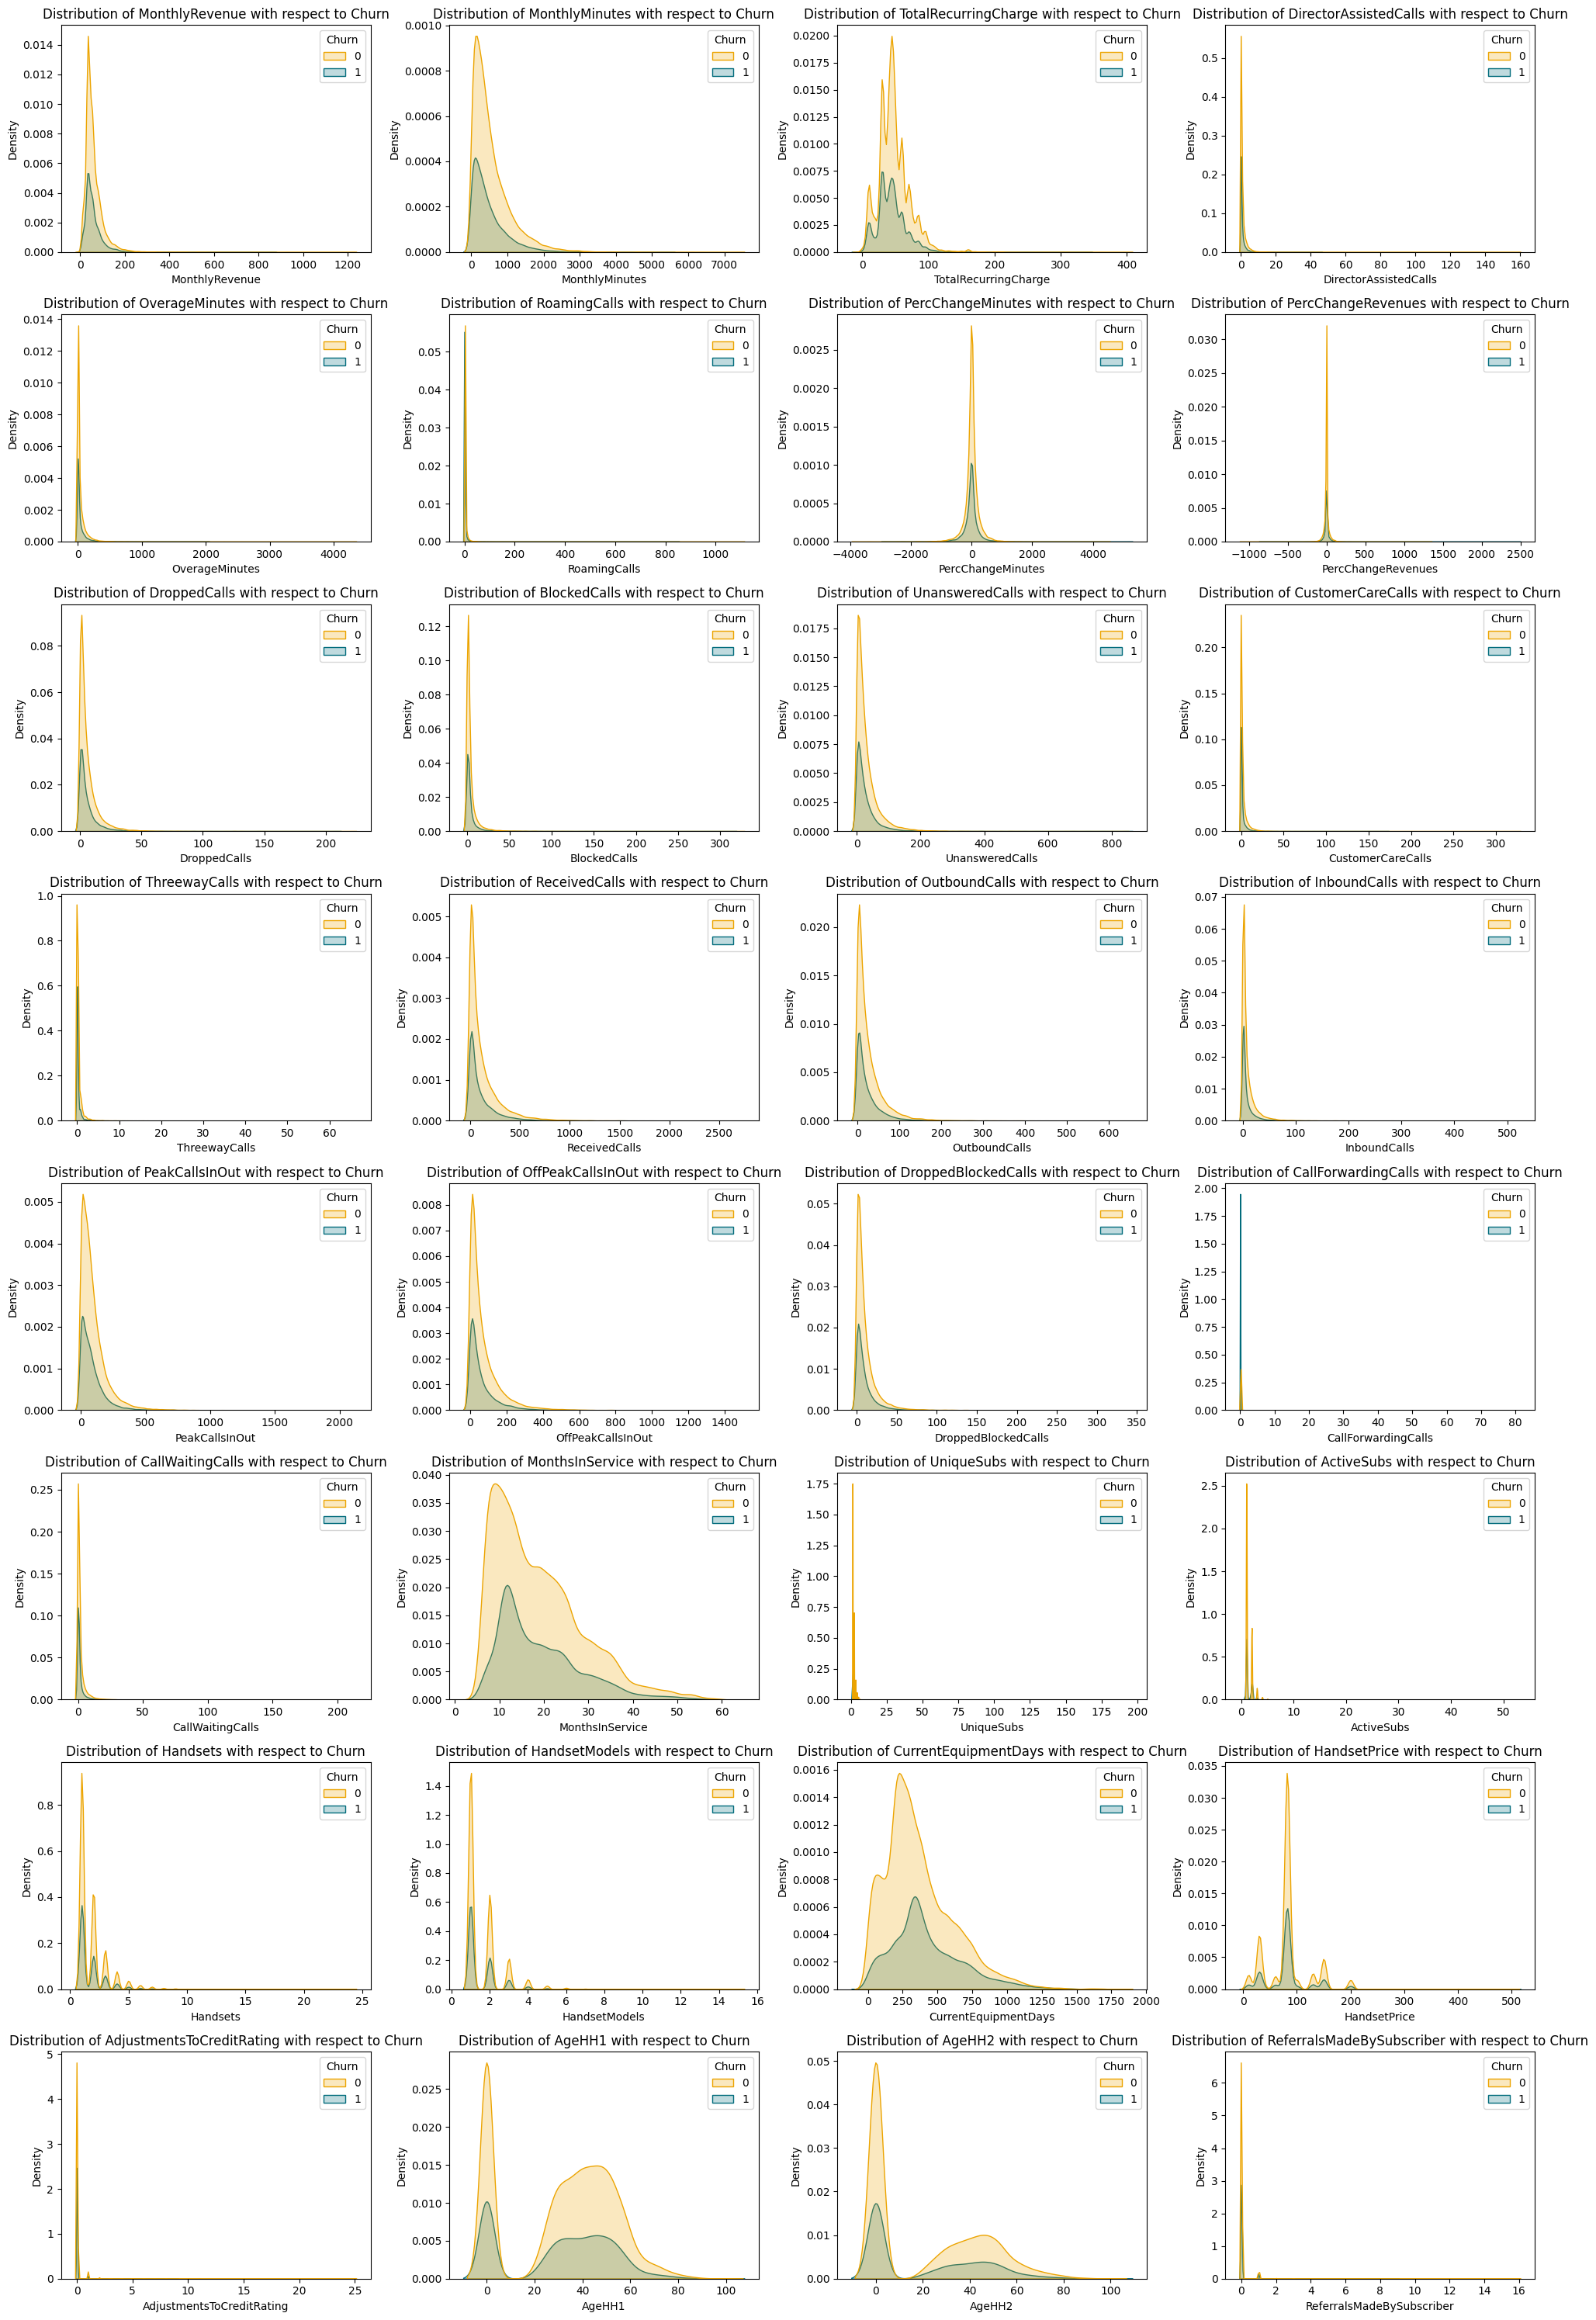

In [105]:
# VISUALISING DISTRIBUTION OF CONTINUOUS FEATURES IN A UNIQUE PLOT USING SUBPLOTS
# There are 28 continuous features
continuous_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                      'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 
                      'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
                      'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
                      'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 
                      'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 
                      'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'HandsetPrice',
                      'AdjustmentsToCreditRating','AgeHH1','AgeHH2', 'ReferralsMadeBySubscriber' ]
number_rows = 8
number_columns = 4

fig, ax = plt.subplots(number_rows, number_columns, figsize=(20, 30))

# Start index for the subplot titles
n = 741

for i, column in enumerate(continuous_columns):
    # Calculate the subplot index
    row = (n - 741) // number_columns
    col = (n - 741) % number_columns
    
    # Create countplot for each binary column
    sns.kdeplot(data=df, x=column, hue='Churn', shade=True, palette = palette, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {column} with respect to Churn')
    
    # Increment subplot index
    n += 1

# Hide any unused subplots
for i in range(len(continuous_columns), number_rows * number_columns):
    ax[i // number_columns, i % number_columns].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [106]:
print(len(categorical_columns))
print(categorical_columns)

7
['RetentionCalls', 'RetentionOffersAccepted', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'IncomeGroup']


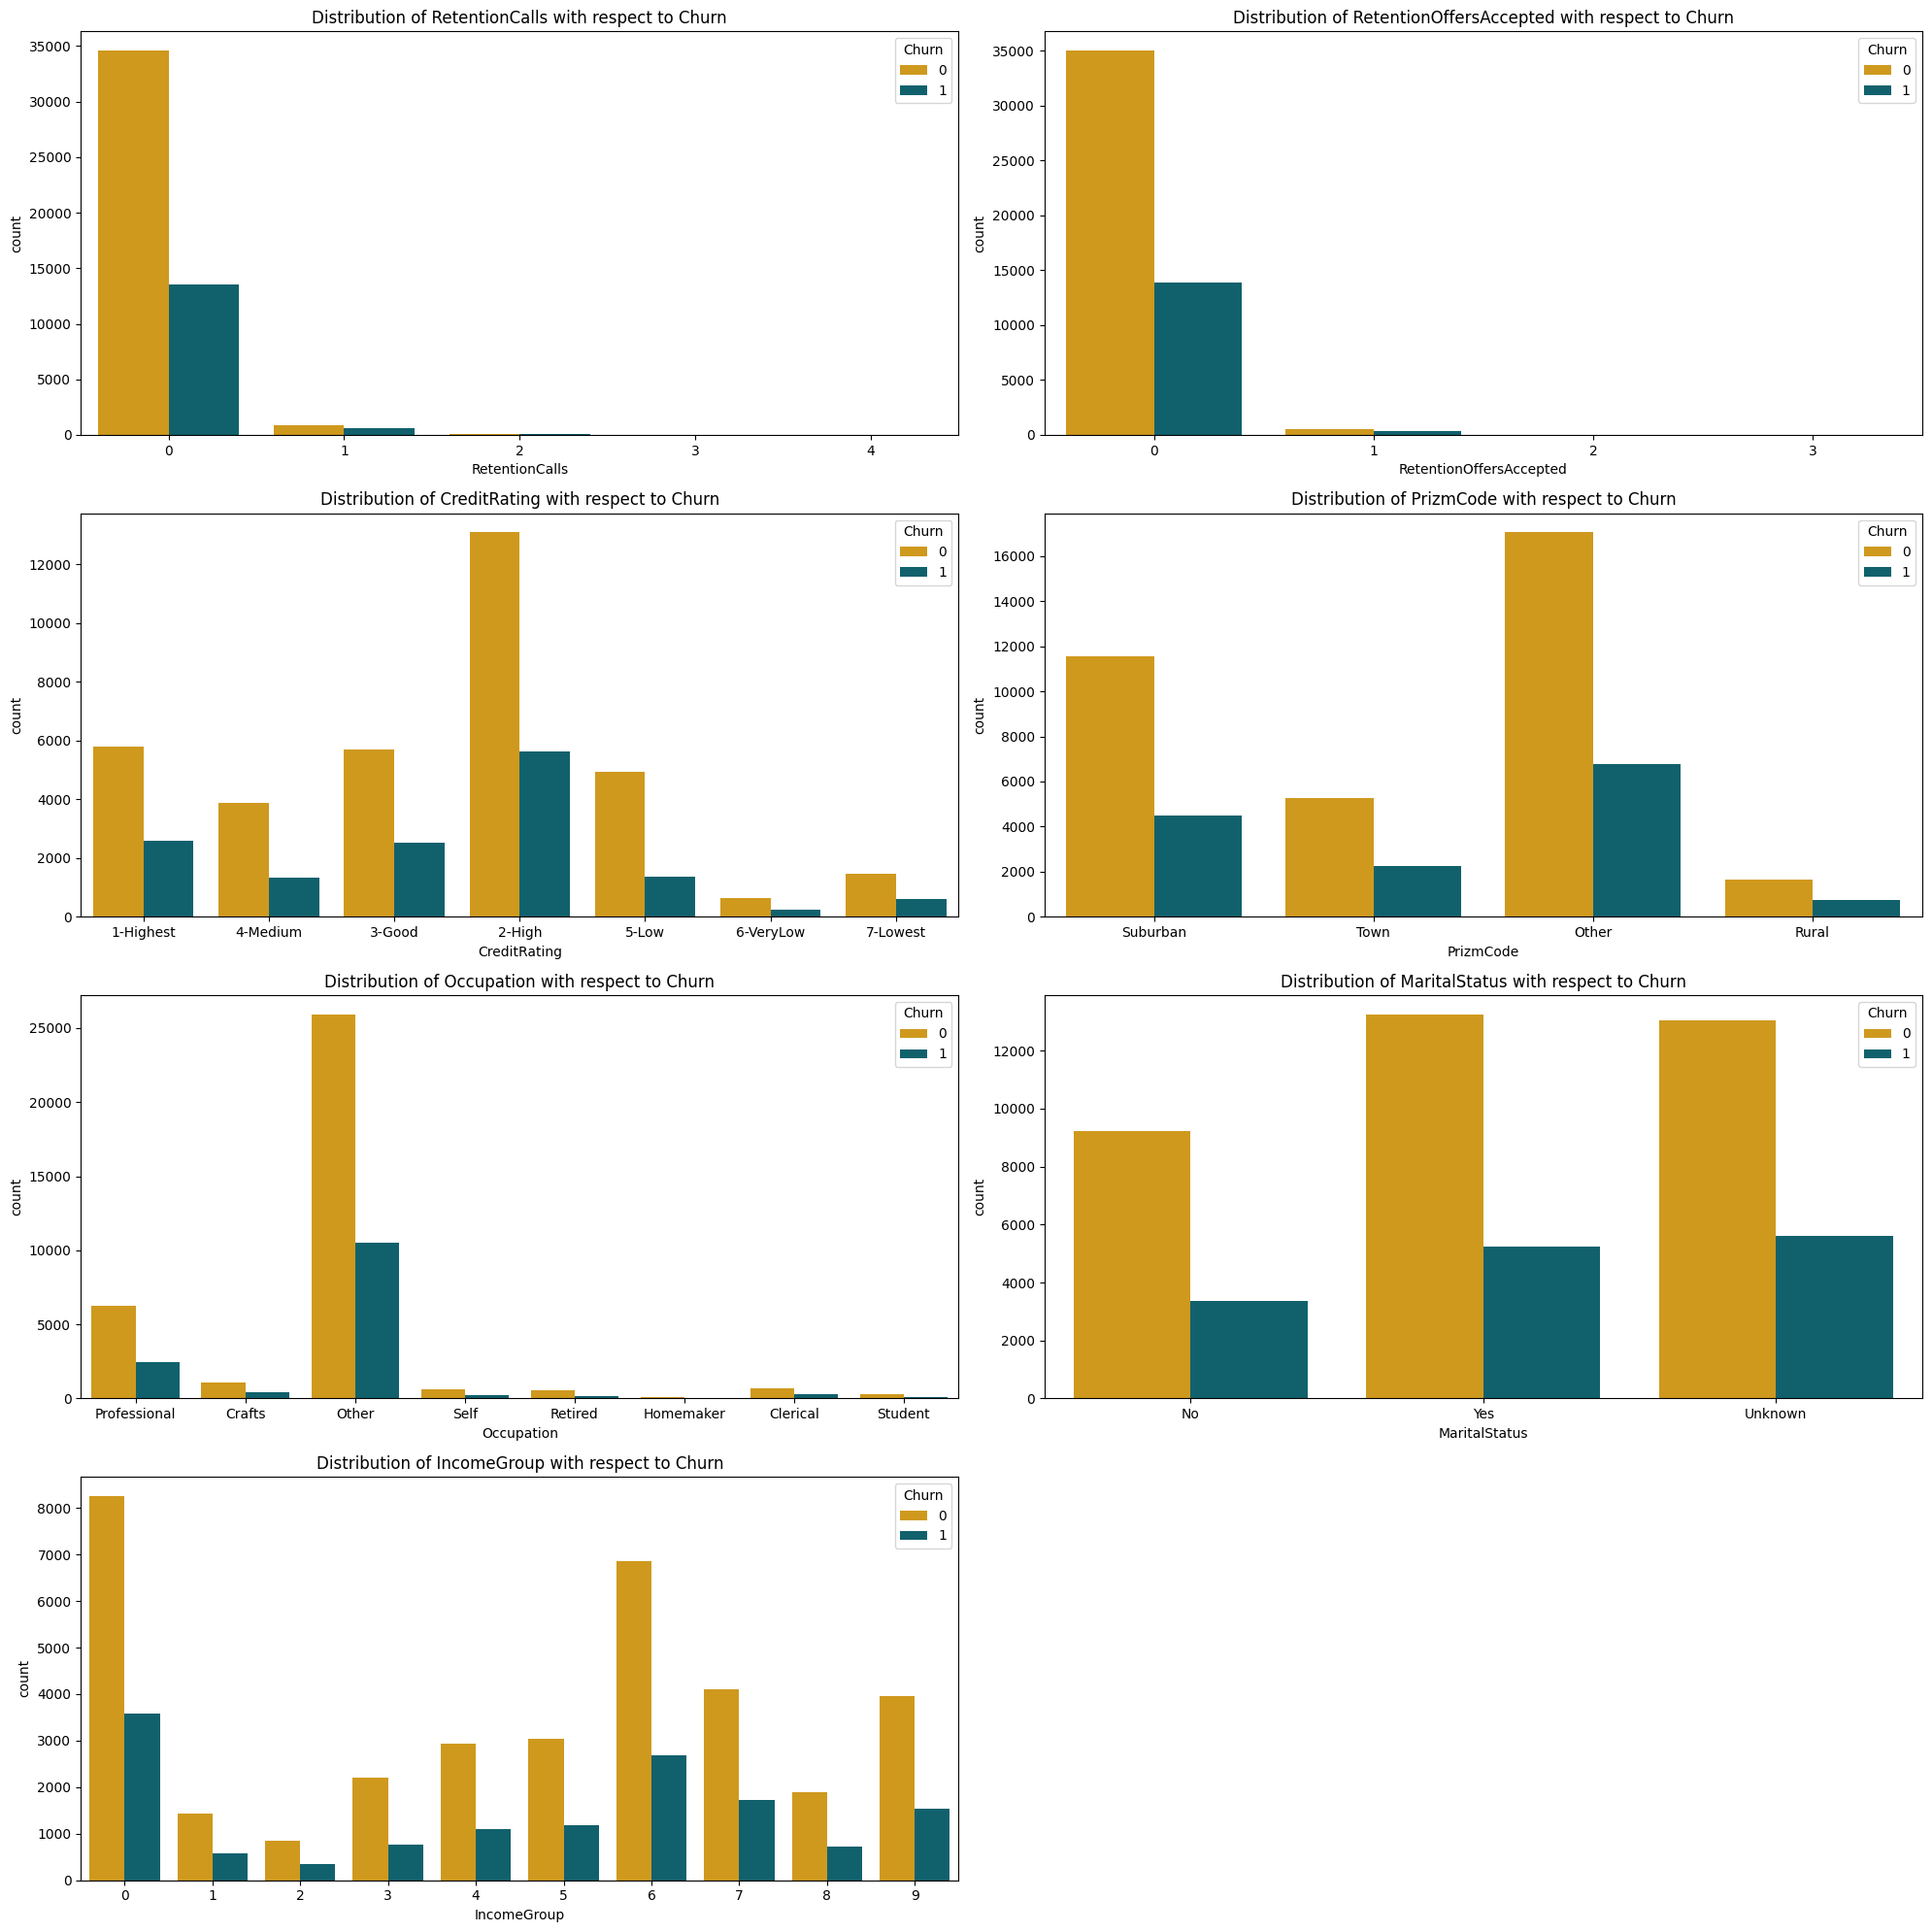

In [107]:
# Visualising categorical features distribution
categorical_columns = ['RetentionCalls', 'RetentionOffersAccepted', 'CreditRating',
                       'PrizmCode', 'Occupation', 'MaritalStatus', 'IncomeGroup']

number_rows = 4
number_columns = 2

fig, ax = plt.subplots(number_rows, number_columns, figsize=(20, 20))

# Start index for the subplot titles
n = 421

for i, column in enumerate(categorical_columns):
    # Calculate the subplot index
    row = (n - 421) // number_columns
    col = (n - 421) % number_columns
    
    # Create countplot for each binary column
    sns.countplot(data=df, x=column, hue='Churn', palette = palette, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {column} with respect to Churn')
    
    # Increment subplot index
    n += 1

# Hide any unused subplots
for i in range(len(categorical_columns), number_rows * number_columns):
    ax[i // number_columns, i % number_columns].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [108]:
print(len(binary_columns))
print(binary_columns)

16
['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam']


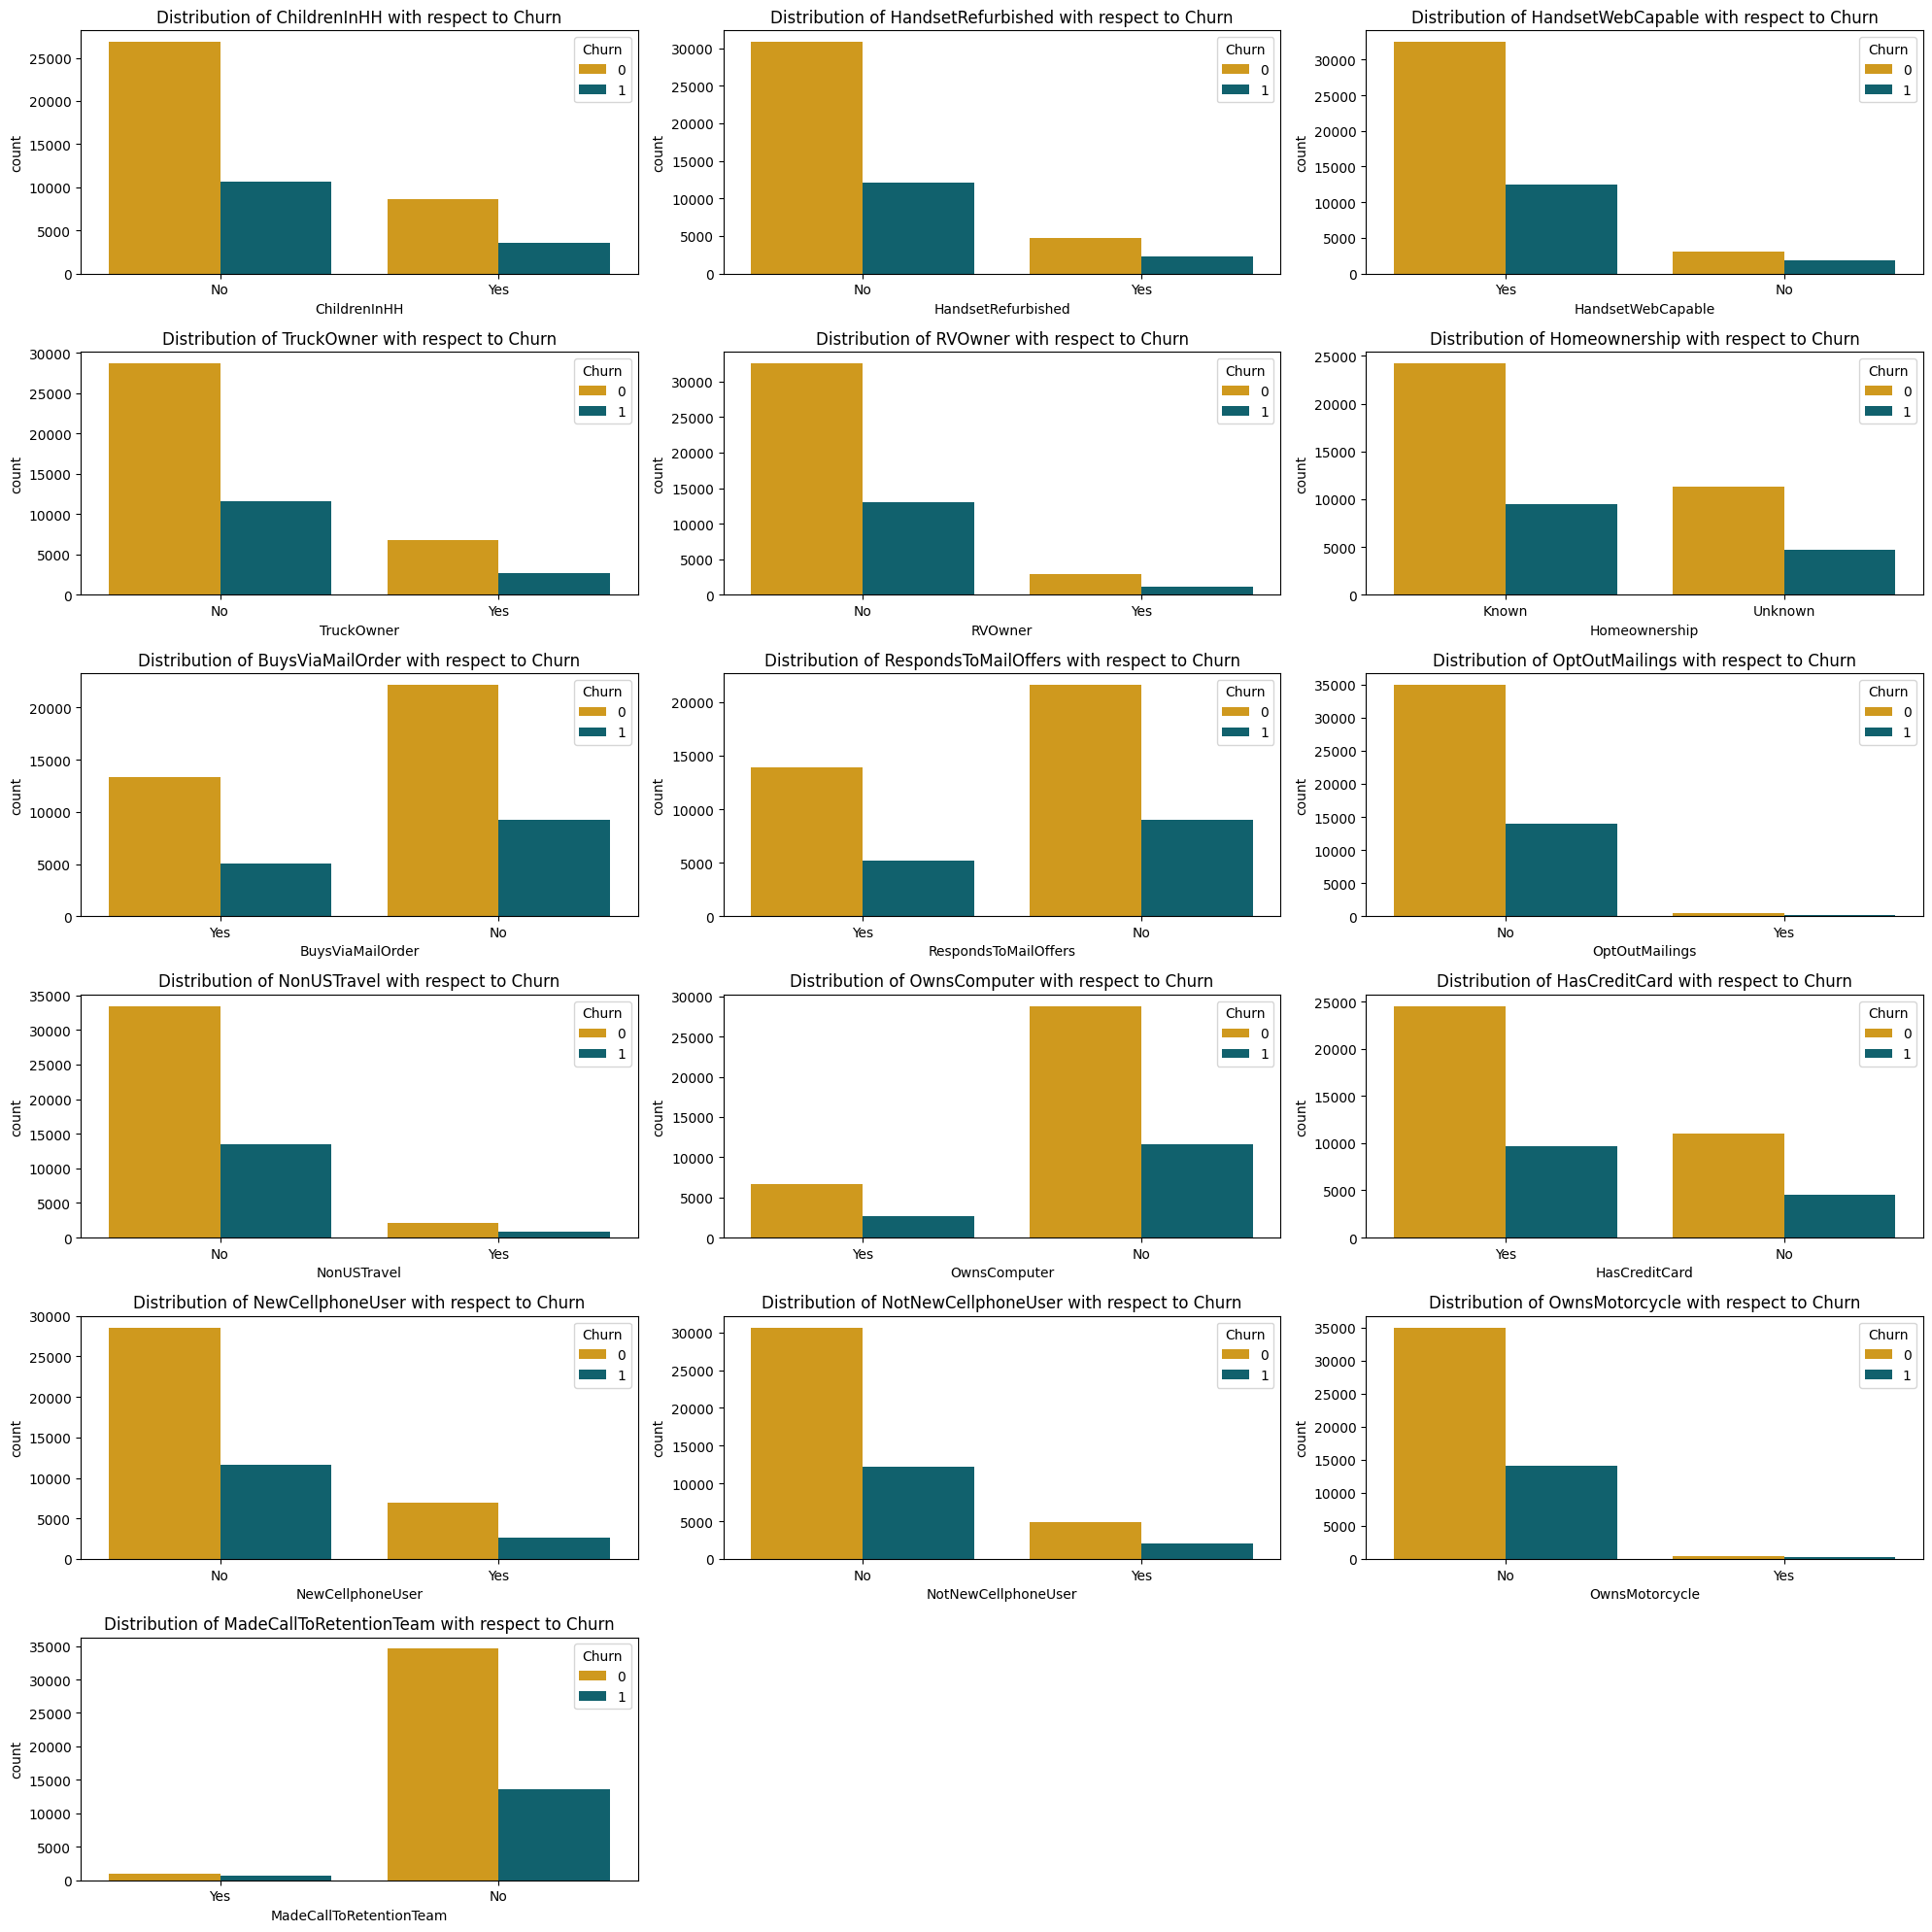

In [109]:
# Visualising binary features distribution
binary_columns = ['ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder',
                  'RespondsToMailOffers','OptOutMailings','NonUSTravel','OwnsComputer','HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle',
                  'MadeCallToRetentionTeam']

number_rows = 6
number_columns = 3

fig, ax = plt.subplots(number_rows, number_columns, figsize=(20, 20))

# Start index for the subplot titles
n = 361

for i, column in enumerate(binary_columns):
    # Calculate the subplot index
    row = (n - 361) // number_columns
    col = (n - 361) % number_columns
    
    # Create countplot for each binary column
    sns.countplot(data=df, x=column, hue='Churn', palette = palette, ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of {column} with respect to Churn')
    
    # Increment subplot index
    n += 1

# Hide any unused subplots
for i in range(len(binary_columns), number_rows * number_columns):
    ax[i // number_columns, i % number_columns].axis('off')

# Adjust layout
plt.tight_layout()

In [110]:
print(binary_columns)

['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam']


In [111]:
# TRANSFORMING THE BINARY FEATURE YES/NO in 1/0 and the one knwnw/unknown in 1/0

binary_columns = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 
                  'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 
                  'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam']
binary_object = [ 'Homeownership']
for i in binary_columns:
    df[i] = df[i].replace({'Yes': 1, 'No': 0}).astype(int)
    
df['Homeownership'] = df['Homeownership'].replace({'Known':1, 'Unknown':0}).astype(int)

In [112]:
print(categorical_columns)

['RetentionCalls', 'RetentionOffersAccepted', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus', 'IncomeGroup']


In [113]:
# Tansforming categorical for corr() and heatmap visualisation (label coding)
for i in categorical_columns:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes
    

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Churn                      49752 non-null  int64   
 1   MonthlyRevenue             49752 non-null  float64 
 2   MonthlyMinutes             49752 non-null  float64 
 3   TotalRecurringCharge       49752 non-null  float64 
 4   DirectorAssistedCalls      49752 non-null  float64 
 5   OverageMinutes             49752 non-null  float64 
 6   RoamingCalls               49752 non-null  float64 
 7   PercChangeMinutes          49752 non-null  float64 
 8   PercChangeRevenues         49752 non-null  float64 
 9   DroppedCalls               49752 non-null  float64 
 10  BlockedCalls               49752 non-null  float64 
 11  UnansweredCalls            49752 non-null  float64 
 12  CustomerCareCalls          49752 non-null  float64 
 13  ThreewayCalls              49752 non

In [115]:
df.drop(columns=['ReferralsBins'], axis=1,  inplace=True)

In [116]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Now you can print the correlation matrix
print(df.corr())
df.corr()

                              Churn  MonthlyRevenue  MonthlyMinutes  \
Churn                      1.000000       -0.012065       -0.050165   
MonthlyRevenue            -0.012065        1.000000        0.712734   
MonthlyMinutes            -0.050165        0.712734        1.000000   
TotalRecurringCharge      -0.058945        0.629391        0.585375   
DirectorAssistedCalls     -0.019714        0.407523        0.392950   
OverageMinutes             0.015301        0.787317        0.569083   
RoamingCalls               0.010955        0.304086        0.112028   
PercChangeMinutes         -0.033194       -0.027052       -0.044257   
PercChangeRevenues         0.013015       -0.014223       -0.038438   
DroppedCalls              -0.015062        0.429374        0.593149   
BlockedCalls              -0.004474        0.232651        0.318114   
UnansweredCalls           -0.028192        0.450751        0.645650   
CustomerCareCalls         -0.035331        0.189579        0.375238   
Threew

Churn  MonthlyRevenue  MonthlyMinutes  \
Churn                      1.000000       -0.012065       -0.050165   
MonthlyRevenue            -0.012065        1.000000        0.712734   
MonthlyMinutes            -0.050165        0.712734        1.000000   
TotalRecurringCharge      -0.058945        0.629391        0.585375   
DirectorAssistedCalls     -0.019714        0.407523        0.392950   
OverageMinutes             0.015301        0.787317        0.569083   
RoamingCalls               0.010955        0.304086        0.112028   
PercChangeMinutes         -0.033194       -0.027052       -0.044257   
PercChangeRevenues         0.013015       -0.014223       -0.038438   
DroppedCalls              -0.015062        0.429374        0.593149   
BlockedCalls              -0.004474        0.232651        0.318114   
UnansweredCalls           -0.028192        0.450751        0.645650   
CustomerCareCalls         -0.035331        0.189579        0.375238   
ThreewayCalls             -0.023716        0.200998        0.287670   
ReceivedCalls             -0.037097        0.604762        0.828206   
OutboundCalls             -0.032489        0.495088        0.694517   
InboundCalls              -0.033855        0.373419        0.558065   
PeakCallsInOut            -0.039527        0.642019        0.772486   
OffPeakCallsInOut         -0.040955        0.473354        0.765215   
DroppedBlockedCalls       -0.012353        0.417567        0.573916   
CallForwardingCalls       -0.003161        0.008935        0.018394   
CallWaitingCalls          -0.025509        0.469497        0.614970   
MonthsInService            0.017544        0.001205       -0.065558   
UniqueSubs                 0.032839       -0.014949       -0.028869   
ActiveSubs                 0.013049       -0.044068       -0.066116   
Handsets                  -0.033730        0.243892        0.303903   
HandsetModels             -0.040470        0.236179        0.293145   
CurrentEquipmentDays       0.102513       -0.216644       -0.311033   
AgeHH1                    -0.028761       -0.108608       -0.163928   
AgeHH2                    -0.017577       -0.105829       -0.143321   
ChildrenInHH               0.009505       -0.048084       -0.064239   
HandsetRefurbished         0.030026        0.045037        0.069743   
HandsetWebCapable         -0.062409        0.101267        0.142751   
TruckOwner                -0.004873       -0.037482       -0.056616   
RVOwner                   -0.003280       -0.013105       -0.031187   
Homeownership             -0.013716       -0.084317       -0.138943   
BuysViaMailOrder          -0.021884       -0.098505       -0.135862   
RespondsToMailOffers      -0.023082       -0.099121       -0.137442   
OptOutMailings             0.000880       -0.027080       -0.039811   
NonUSTravel               -0.002816       -0.042151       -0.051114   
OwnsComputer              -0.001231       -0.078887       -0.109123   
HasCreditCard             -0.009204       -0.081925       -0.125792   
RetentionCalls             0.058422        0.012019        0.011856   
RetentionOffersAccepted    0.034511        0.014795        0.014966   
NewCellphoneUser          -0.007639        0.009941        0.018157   
NotNewCellphoneUser        0.006900        0.046602        0.045769   
ReferralsMadeBySubscriber -0.011390        0.017879        0.064916   
IncomeGroup               -0.012982       -0.079309       -0.145964   
OwnsMotorcycle             0.007700       -0.010377       -0.016976   
AdjustmentsToCreditRating -0.016123        0.035417        0.045723   
HandsetPrice              -0.001603        0.105991        0.146954   
MadeCallToRetentionTeam    0.060577        0.012137        0.009875   
CreditRating              -0.047741        0.139504        0.206566   
PrizmCode                  0.005204       -0.051784       -0.080951   
Occupation                -0.005276       -0.032440       -0.043907   
MaritalStatus              0.010019       -0.075591   

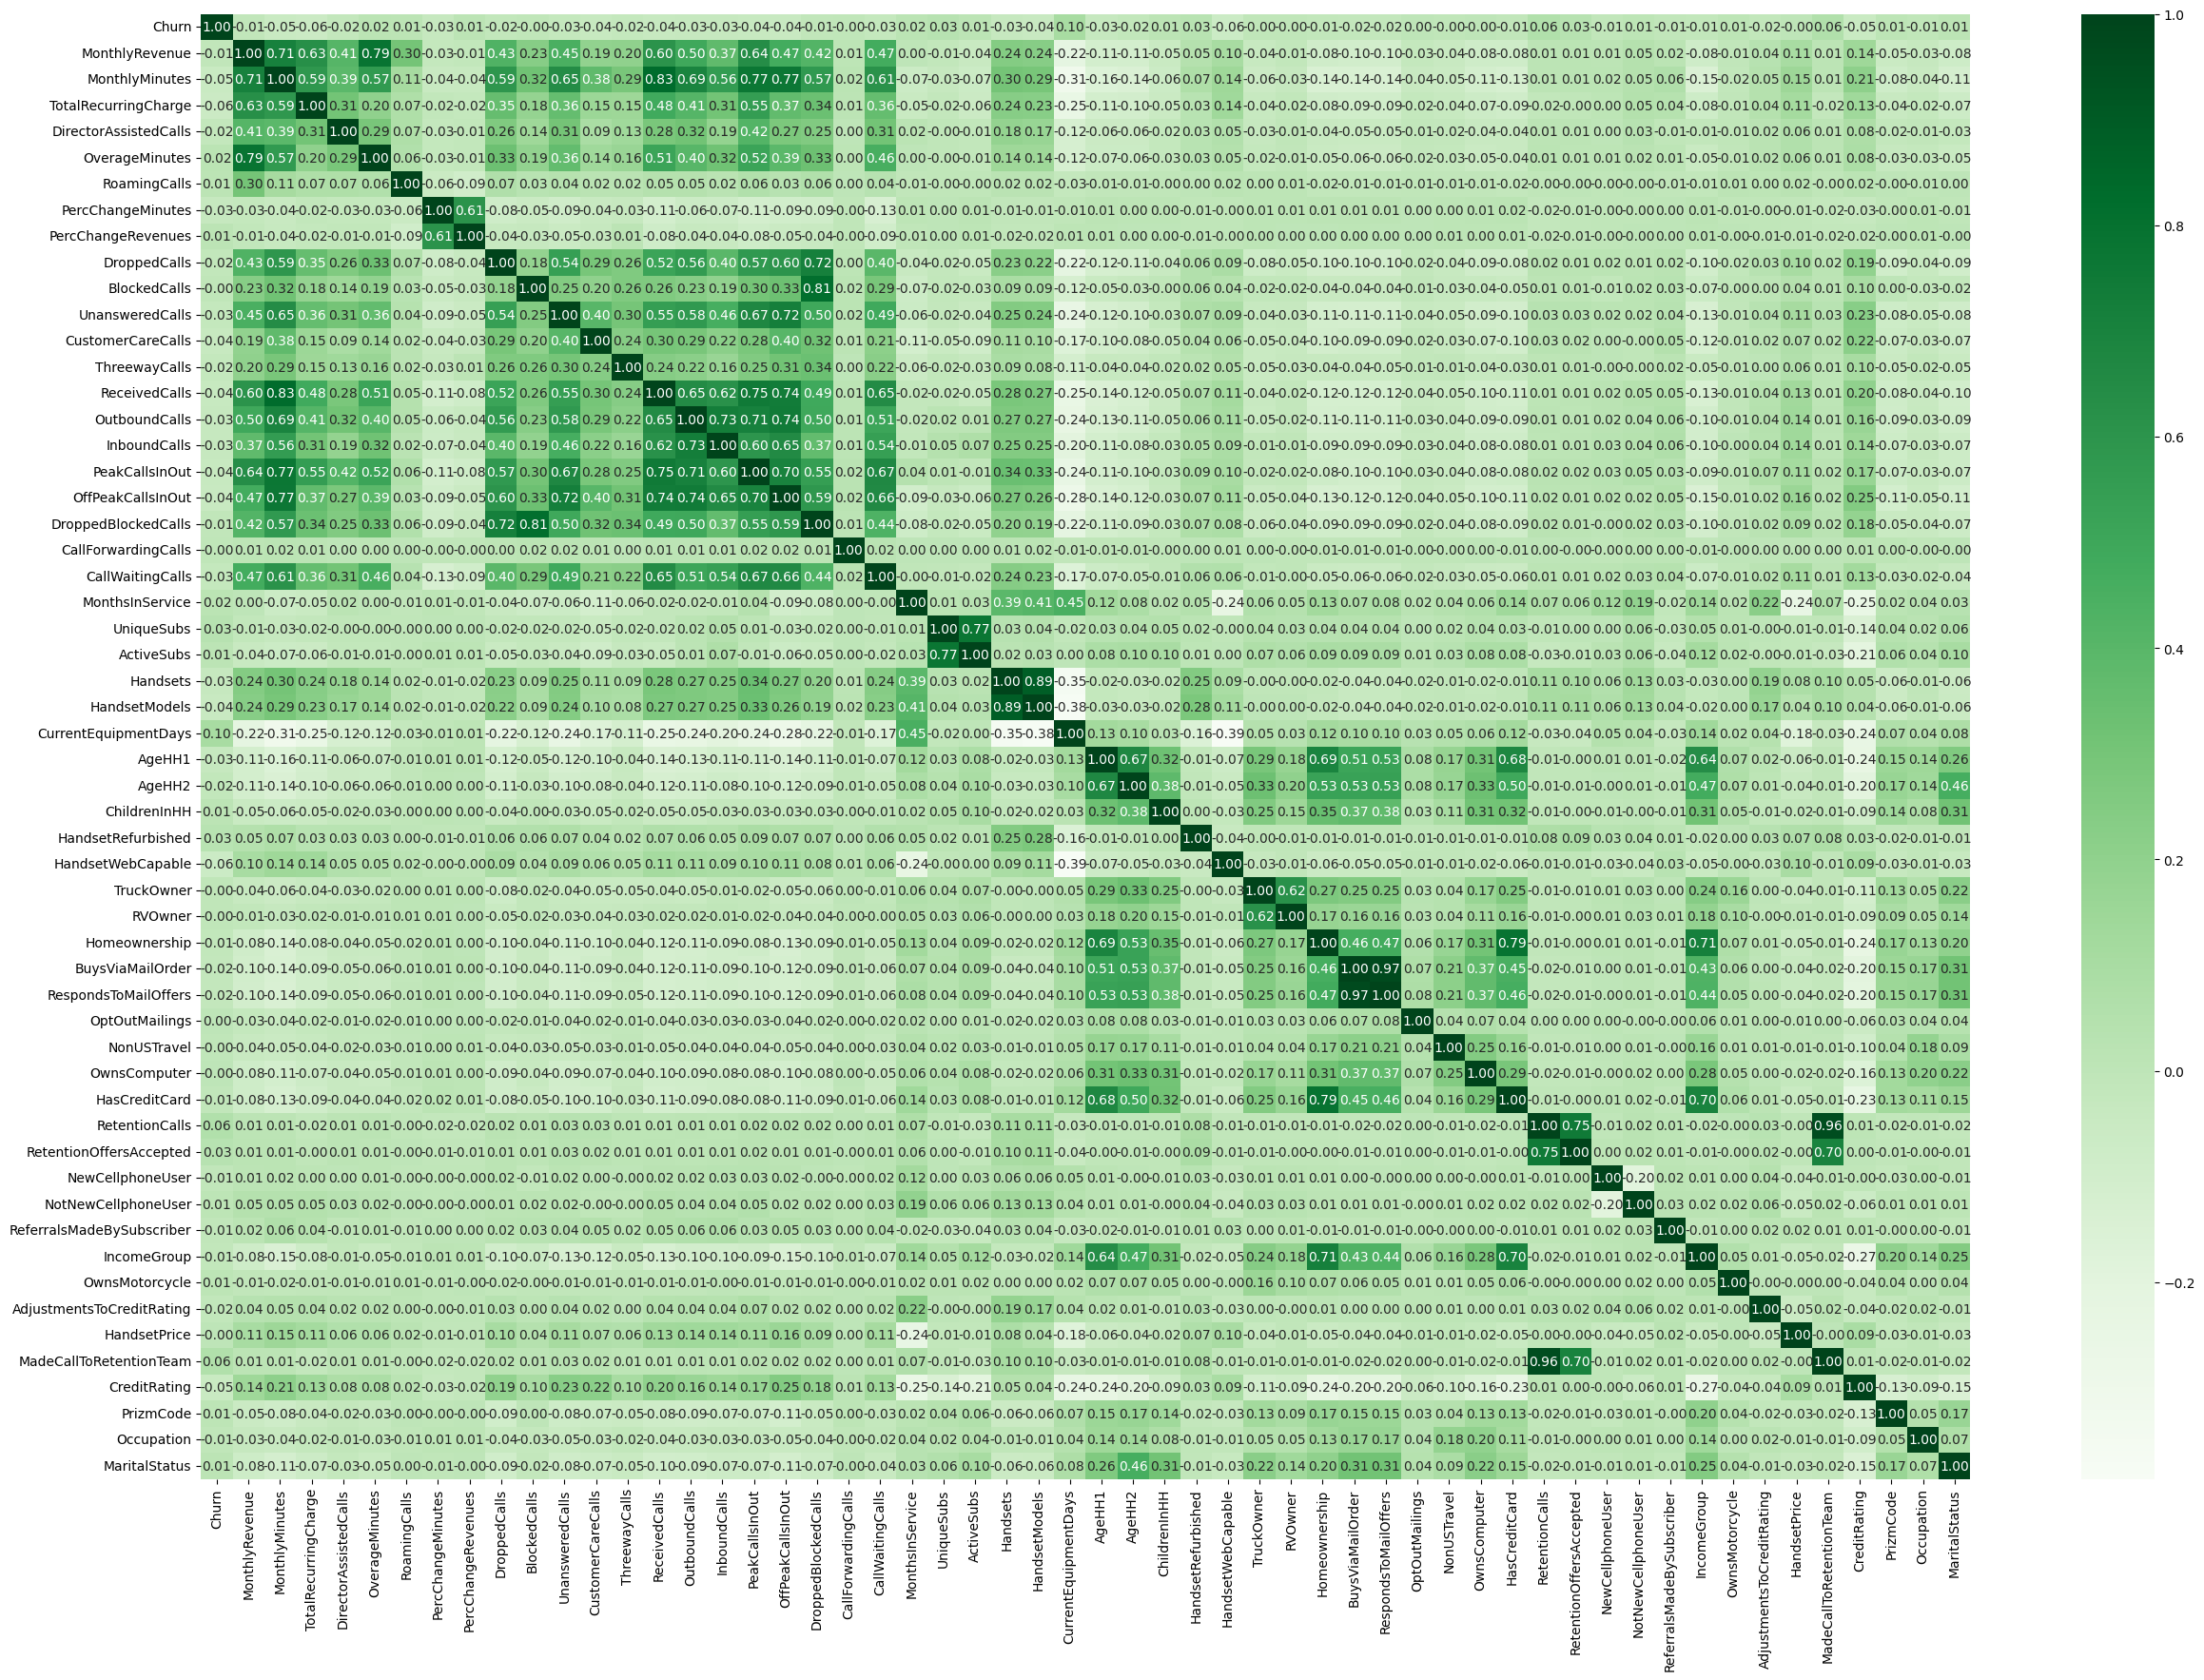

In [117]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, cmap='Greens', fmt=".2f")
plt.title('')
plt.show()

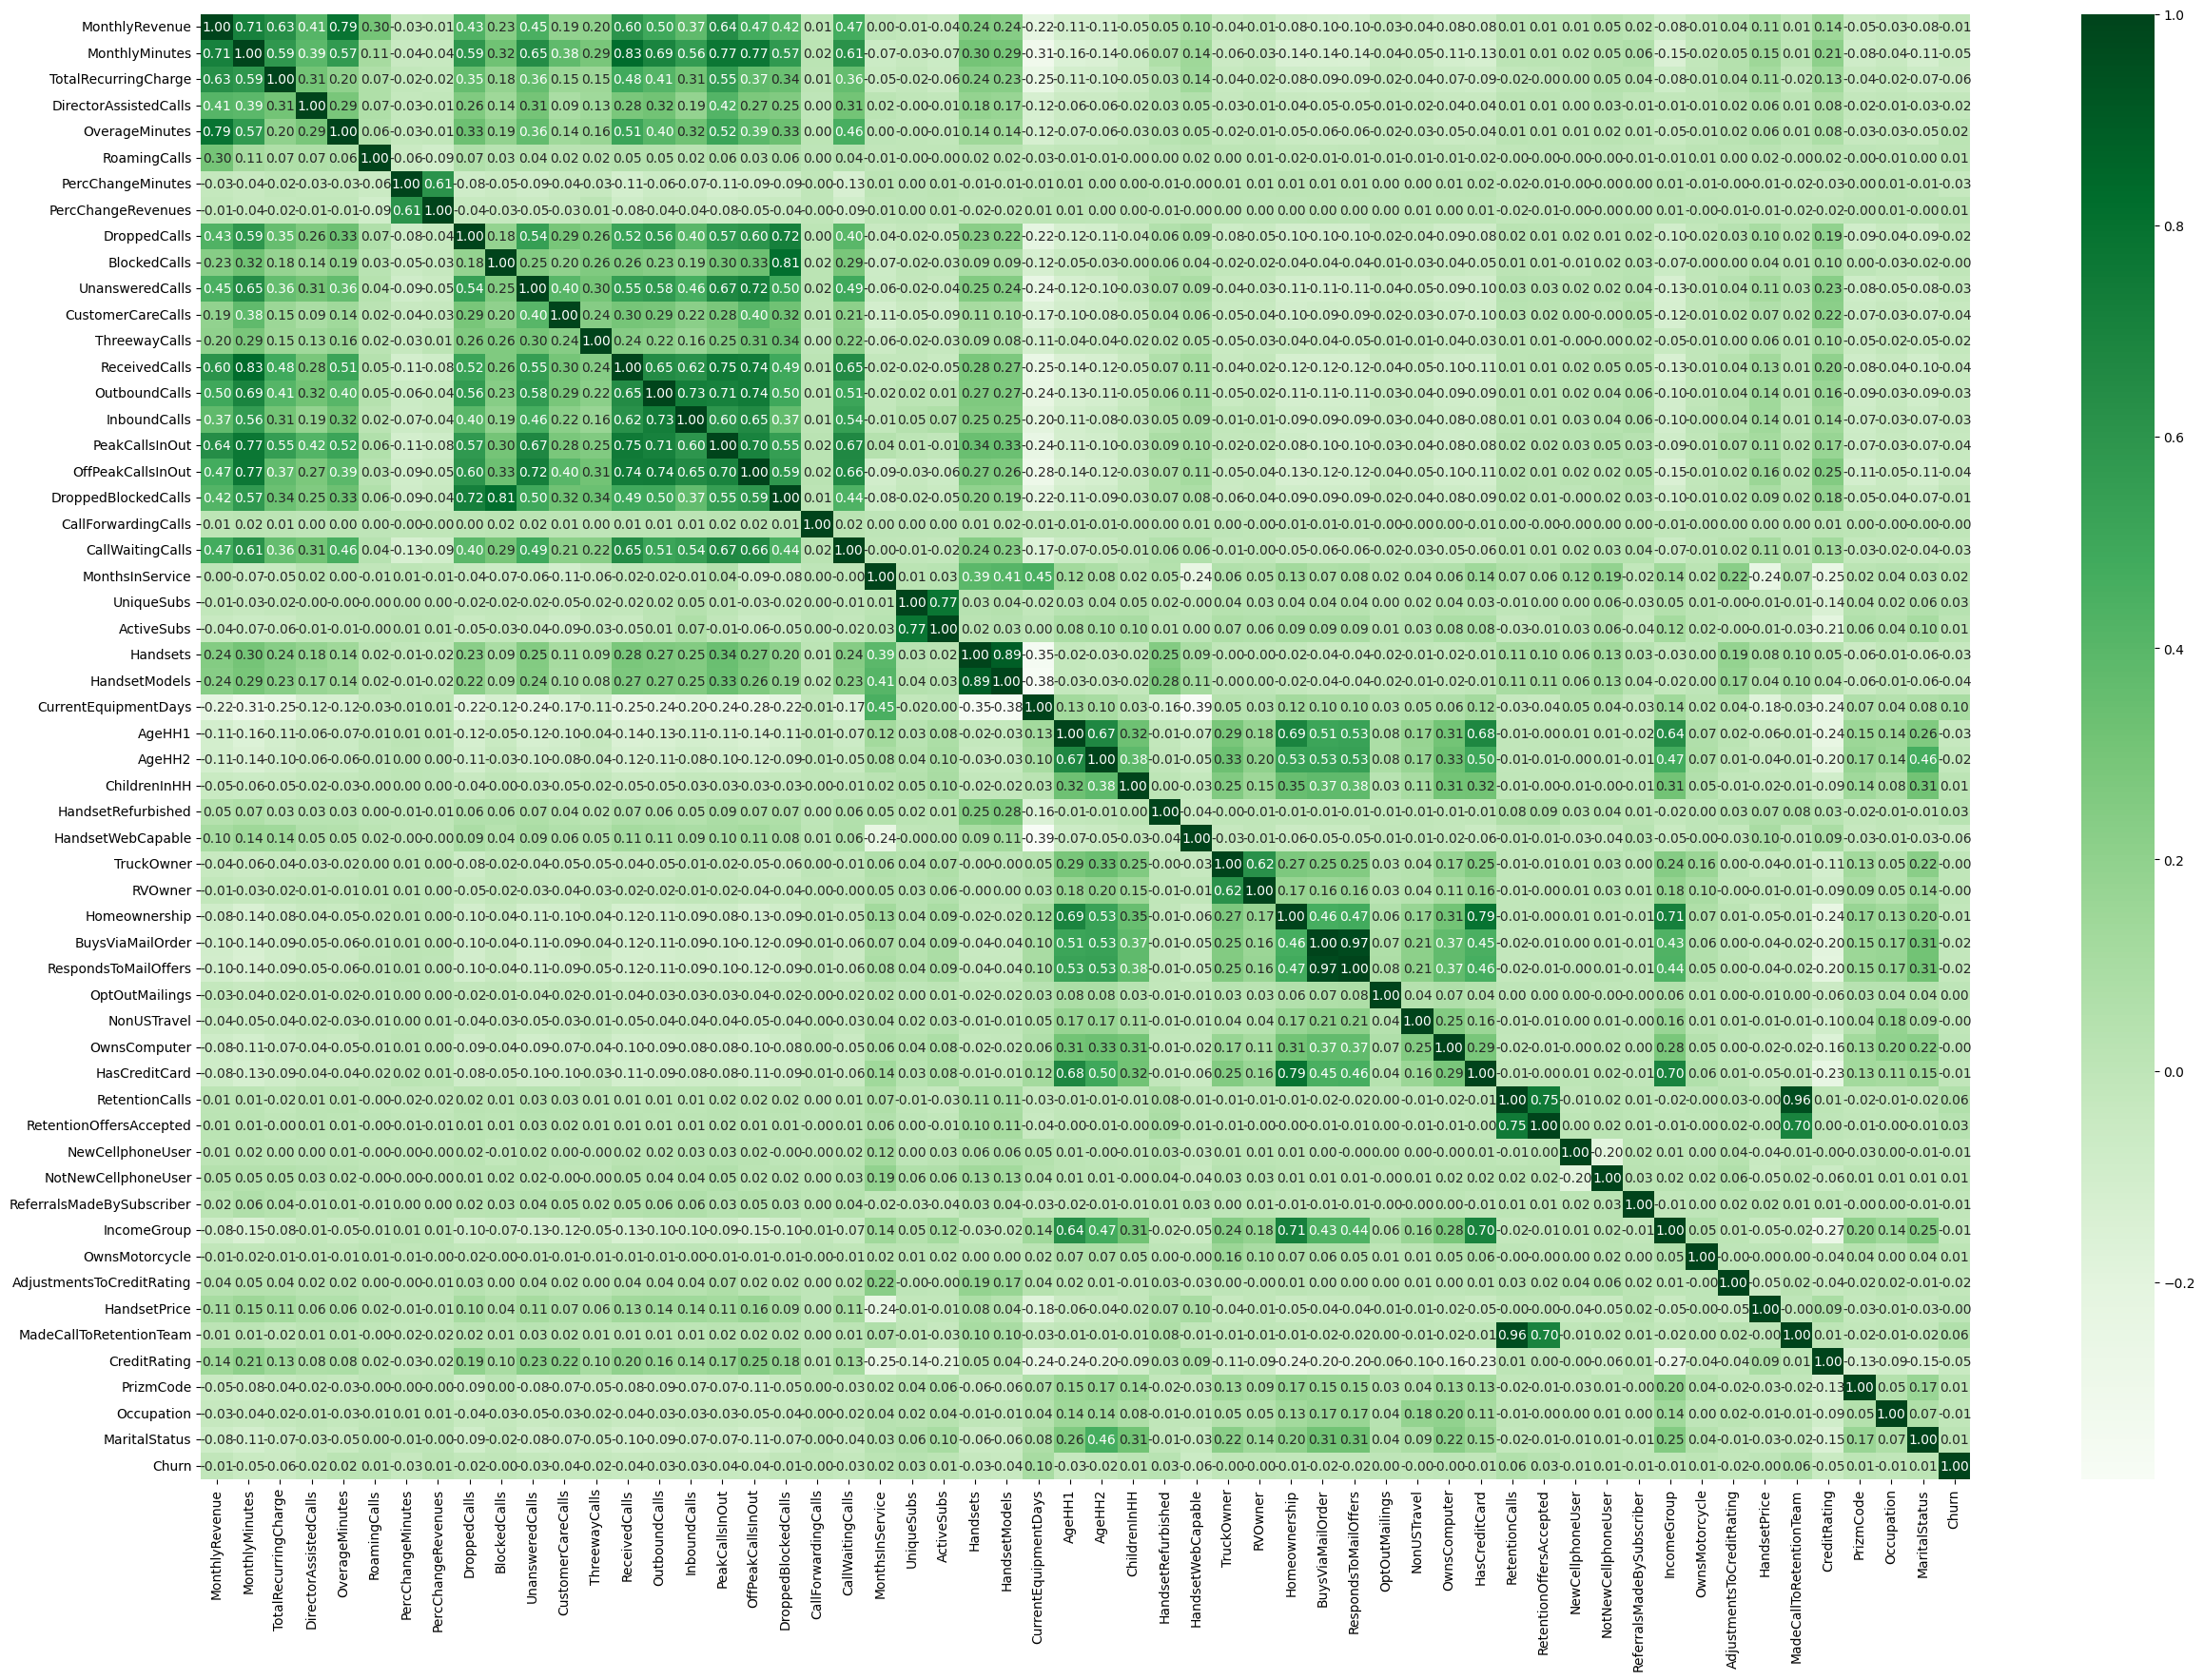

In [118]:
# Correlation analysis
dependable = 'Churn'
fig, ax = plt.subplots(figsize=(30, 20))

# Concatenate DataFrame columns and compute correlation
correlation_matrix = df.drop(dependable, axis=1).join(df[dependable]).corr()

# Generate heatmap with formatting
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Greens')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      49752 non-null  int64  
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  float64


In [120]:
dff = df

#### 5. Features choice and features engineering
The dataframe I will work with has 49747 entries<br/>
I will prepare 3 set of data to train the models:
* All the features, with categorical feature hot coded
* Manual feature selection using pearson coefficient of correlation absolute value > 0.02
* PCA


In [121]:
# HOT ENCODING CATEGORICAL FEATURES
# for i in categorical_columns:
#     df[i] = df[i].astype('category')
#     df[i] = df[i].cat.codes
for i in categorical_columns:
    df=pd.get_dummies(df, columns=[i], drop_first= True, dtype = 'int')

In [122]:
df.shape

(49752, 83)

In [123]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      49752 non-null  int64  
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  float64


In [124]:
# Manual selection of features from the original dataset, where correlation is >0.02 and <-0.02
# Overall correlation is very low, with a pick for 
df_selection =dff[['MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes','UniqueSubs','Handsets',
                  'CurrentEquipmentDays', 'HandsetRefurbished','HandsetWebCapable','RetentionCalls','RetentionOffersAccepted', 'CreditRating']]
print(len(df_selection))
print(len(df_selection.columns))

49752
11


#### 6. Preparing the data for training the model

6.1 Performing PCA and creating set of training and test data 
* X_train_pca 
* X_test_pca
* y_train
* y_test

PCA() is initially applied without specifying the number of components, which means it will keep all components. <br/>
Then, the cumulative explained variance is calculated using np.cumsum(pca.explained_variance_ratio_). <br/>
Finally, the number of components required to explain at least 85% of the variance is determined, and PCA is applied again with the selected number of components. <br/>
Please note PCA is fit only on training data and then it is used to transform the test data. <br/>
(From https://medium.com/nerd-for-tech/dimensionality-reduction-techniques-pca-lca-and-svd-f2a56b097f7c)

In [125]:
# Defyning the X and y and checking shape and type
X = df.iloc[:, 1:83].values
y = df.iloc[:, 0].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))


(49752, 82)
(49752,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [126]:
# Split the data
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 1/4, random_state=32)

In [127]:
# Scale the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to keep for 85% variance explained
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1
print(n_components)

47


In [128]:
# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Display the results
print("Original Training Data Shape:", X_train.shape)
print("Reduced Training Data Shape (PCA):", X_train_pca.shape)
print("Number of Components Selected:", n_components)


Original Training Data Shape: (37314, 82)
Reduced Training Data Shape (PCA): (37314, 47)
Number of Components Selected: 47


In [129]:
pca = PCA(n_components=47)
X_train_pca = pca.fit_transform(X_train_scaled)

6.2 Preparing df_selection for training with splitting and scaling and create 
* X_train_s_scaled
* X_test_s_scaled
* y_train_s
* y_test_s

In [130]:
df_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MonthlyMinutes           49752 non-null  float64
 1   TotalRecurringCharge     49752 non-null  float64
 2   PercChangeMinutes        49752 non-null  float64
 3   UniqueSubs               49752 non-null  int64  
 4   Handsets                 49752 non-null  float64
 5   CurrentEquipmentDays     49752 non-null  float64
 6   HandsetRefurbished       49752 non-null  int32  
 7   HandsetWebCapable        49752 non-null  int32  
 8   RetentionCalls           49752 non-null  int8   
 9   RetentionOffersAccepted  49752 non-null  int8   
 10  CreditRating             49752 non-null  int8   
dtypes: float64(5), int32(2), int64(1), int8(3)
memory usage: 4.2 MB


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49752 entries, 0 to 51043
Data columns (total 83 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      49752 non-null  int64  
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  float64


In [132]:
# Identify dependable variable/tartget y and independent variables X
X_selected = df_selection.iloc[:, :].values
y_selected = df.iloc[:, 0].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(49752, 82)
(49752,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [133]:
# Split the data
X_train_s,X_test_s, y_train_s, y_test_s = train_test_split(X_selected,y_selected, test_size= 0.2, random_state=32)

In [136]:
# Scale the data
scaler = StandardScaler()
X_train_s_scaled = scaler.fit_transform(X_train_s)
X_test_s_scaled = scaler.transform(X_test_s)

6.3 Preparing full cleaned dataset df for training the model, splitting, scaling and create the set of data:
* X_train_full_scaled
* X_test_full_scaled
* y_train_full
* y_test_full
    

In [137]:
# Defyning the X and y and checking shape and type
X_full = df.iloc[:, 1:83].values
y_full = df.iloc[:, 0].values
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(49752, 82)
(49752,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [138]:
# Split the data
X_train_full,X_test_full, y_train_full, y_test_full = train_test_split(X_full,y_full, test_size= 0.2, random_state=32)

In [139]:
# Scale the data
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)
X_test_full_scaled = scaler.transform(X_test_full)

#### 7. Training a logistic regression model as baseline
* Logistic Regression as baseline, trined with the 3 data sets
* Making prediction
* Evaluating models
* Fine tune hyperparameteres


In [144]:
#PCA
X_train_pca 
X_test_pca
y_train
y_test

#df_selection
X_train_s_scaled
X_test_s_scaled
y_train_s
y_test_s

#df
X_train_full_scaled
X_test_full_scaled
y_train_full
y_test_full

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [145]:
# Fitting the model with PCA
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [146]:
# Fitting the model with df_selection
log_reg_s = LogisticRegression()
log_reg_s.fit(X_train_s_scaled, y_train_s)

LogisticRegression()

In [147]:
# Fitting the model with df
log_reg_full = LogisticRegression()
log_reg_full.fit(X_train_full_scaled, y_train_full)

LogisticRegression()

In [148]:
# Making prediction
y_pred_pca = log_reg_pca.predict(X_test_pca)
y_pred_selection = log_reg_s.predict(X_test_s_scaled)
y_pred_full = log_reg_full.predict(X_test_full_scaled)

In [149]:
# Calculate accuracy with accuracy_score
print('Accuracy pca:', metrics.accuracy_score(y_test, y_pred_pca))
print('Accuracy features selection:', metrics.accuracy_score(y_test_s, y_pred_selection))
print('Accuracy full features:', metrics.accuracy_score(y_test_full, y_pred_full))

Accuracy pca: 0.7129763627592861
Accuracy features selection: 0.7197266606371219
Accuracy full features: 0.7185207516832479


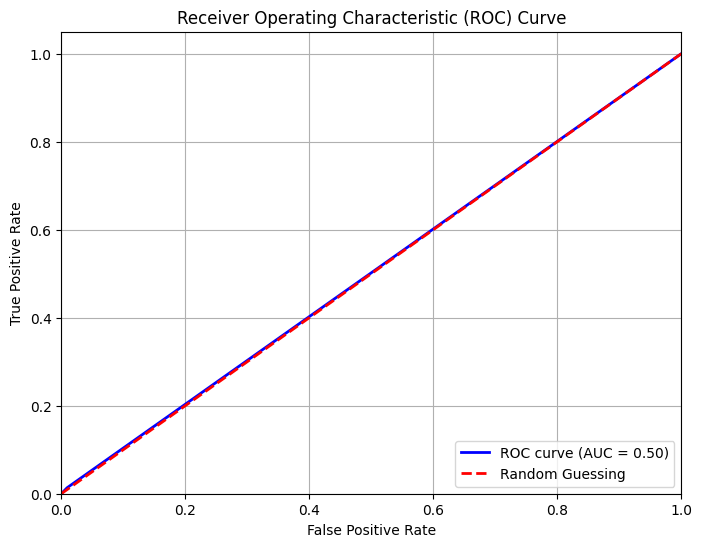

In [150]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_pca)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

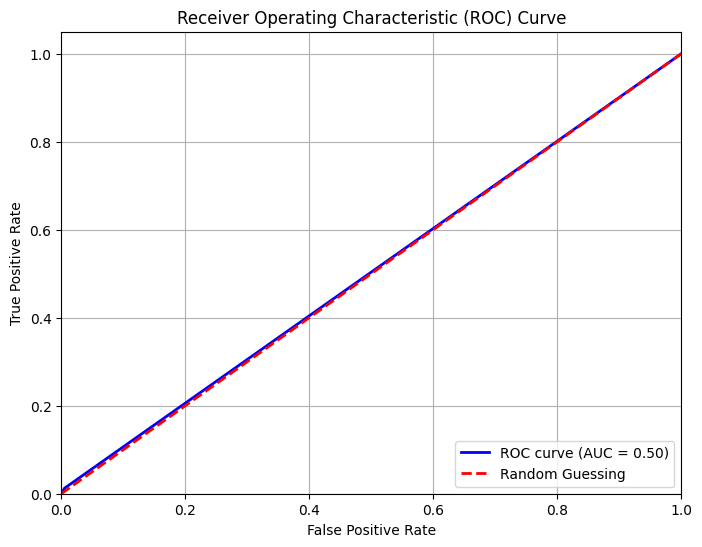

In [151]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_s,  y_pred_selection)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

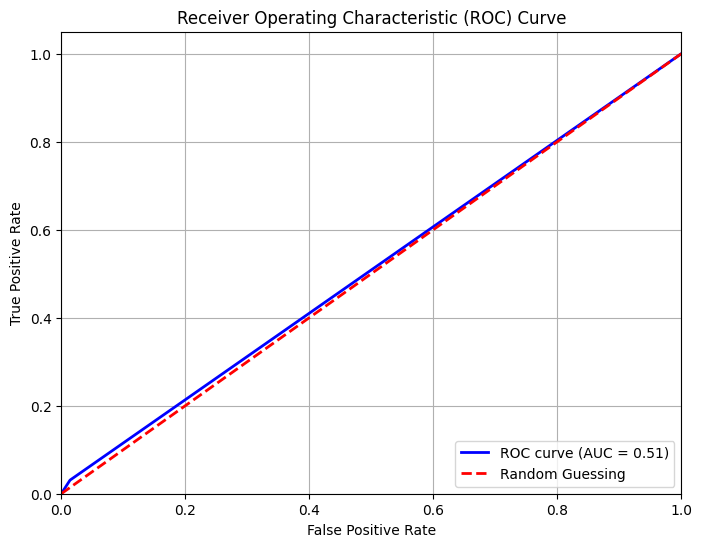

In [152]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_full,  y_pred_full)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

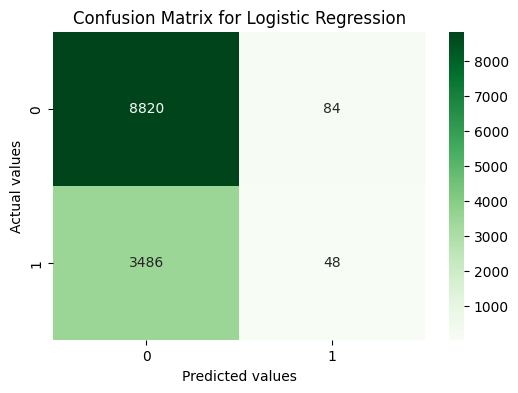

In [153]:
# Plotting confusion matrix for Logistic with PCA
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_pca ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

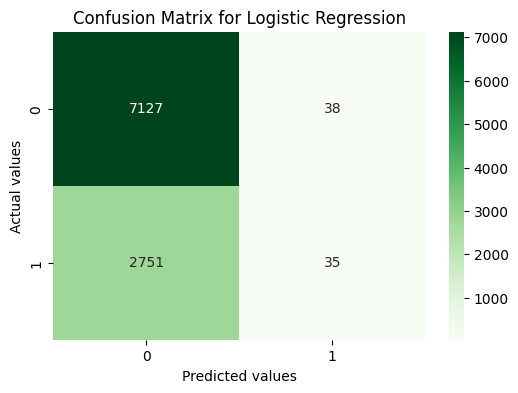

In [154]:
# Plotting confusion matrix for Logistic regression with selection of features
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_s, y_pred_selection ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

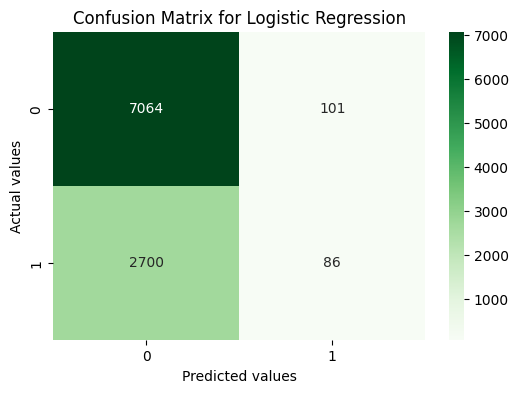

In [155]:
# Plotting confusion matrix for Logistic regression with fulle set of features
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_full, y_pred_full ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [156]:
#PCA
X_train_pca 
X_test_pca
y_train
y_test

#df_selection
X_train_s_scaled
X_test_s_scaled
y_train_s
y_test_s

#df
X_train_full_scaled
X_test_full_scaled
y_train_full
y_test_full

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [146]:
# Creating a function to compare different model by accuracy and recall

def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred> 0.5, 1, 0)
    Accuracy = round(metrics.accuracy_score(y_test, y_pred), 2)
    Recall = round(recall_score(y_test, y_pred), 2)
    Precision = round(precision_score(y_test, y_pred), 2)
    F1_score = round(f1_score(y_test, y_pred), 2)
    return pd.DataFrame([Accuracy, Recall, Precision, F1_score], index=['Accuracy', 'Recall', 'Precision','F1_score'], columns=[model_name])


In [158]:
model_name = 'Logistic Regression'

In [159]:
model_name = 'Logistic Regression with PCA'
model_evaluation(log_reg_pca, X_test_pca, y_test, model_name)

Logistic Regression with PCA
Accuracy                           0.71
Recall                             0.01
Precision                          0.36
F1_score                           0.03

In [160]:
model_name = 'Logistic Regression with full data'
model_evaluation(log_reg_full, X_test_full_scaled, y_test_full, model_name)

Logistic Regression with full data
Accuracy                                 0.72
Recall                                   0.03
Precision                                0.46
F1_score                                 0.06

In [161]:
model_name = 'Logistic Regression with feature selection'
model_evaluation(log_reg_s, X_test_s_scaled, y_test_s, model_name)

Logistic Regression with feature selection
Accuracy                                         0.72
Recall                                           0.01
Precision                                        0.48
F1_score                                         0.02

Fine tuning parameters for the best performing model, the logistic regression trained with full set of data. <br/>
Dont hold your breath, results are no better than the baseline regression. 

In [162]:
# Comparing different solvers
clf = [
    LogisticRegression(solver='newton-cg',penalty=None,max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty=None,max_iter=1000),
    LogisticRegression(solver='sag',penalty=None,max_iter=1000),
    LogisticRegression(solver='saga',penalty=None,max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_full_scaled, y_train_full).predict(X_test_full_scaled)
    fp, tp, th = roc_curve(y_test_full, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_full_scaled, y_train_full), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_full_scaled, y_test_full), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test_full, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_full, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

Train Accuracy  Test Accuracy  Precision   Recall      AUC
1         0.71244        0.71872    0.46561  0.03159  0.50875
0         0.71244        0.71862    0.46277  0.03123  0.50857
2         0.71244        0.71862    0.46277  0.03123  0.50857
3         0.71244        0.71862    0.46277  0.03123  0.50857

In [163]:
# Adding penalty
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_full_scaled, y_train_full).predict(X_test_full_scaled)
    fp, tp, th = roc_curve(y_test_full, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_full_scaled, y_train_full), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_full_scaled, y_test_full), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test_full, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_full, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

Train Accuracy  Test Accuracy  Precision   Recall      AUC
0         0.71244        0.71862    0.46277  0.03123  0.50857
2         0.71247        0.71862    0.46277  0.03123  0.50857
3         0.71247        0.71862    0.46277  0.03123  0.50857
1         0.71244        0.71852    0.45989  0.03087  0.50839

In [164]:
# adding C
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2',C=0.001,max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',C=0.001,  max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',C=0.001, max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',C=0.001,max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train_full_scaled, y_train_full).predict(X_test_full_scaled)
    fp, tp, th = roc_curve(y_test_full, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train_full_scaled, y_train_full), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test_full_scaled, y_test_full), 5)
    clf_compare.loc[row_index, 'Precision'] = round(precision_score(y_test_full, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test_full, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
clf_compare

Train Accuracy  Test Accuracy  Precision   Recall      AUC
0          0.7128        0.71792    0.40367  0.01579  0.50336
1          0.7128        0.71792    0.40367  0.01579  0.50336
2          0.7128        0.71792    0.40367  0.01579  0.50336
3          0.7128        0.71792    0.40367  0.01579  0.50336

#### 8. Training Random Forest model with the 3 data sets, making predictions and evaluate the models

In [165]:
#PCA
X_train_pca 
X_test_pca
y_train
y_test

#df_selection
X_train_s_scaled
X_test_s_scaled
y_train_s
y_test_s

#df
X_train_full_scaled
X_test_full_scaled
y_train_full
y_test_full

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [166]:
rf_pca = RandomForestRegressor()
rf_pca.fit(X_train_pca, y_train)

RandomForestRegressor()

In [167]:
rf_selection = RandomForestRegressor()
rf_selection.fit(X_train_s_scaled, y_train_s)

RandomForestRegressor()

In [168]:
rf_full = RandomForestRegressor()
rf_full.fit(X_train_full_scaled, y_train_full)

RandomForestRegressor()

In [169]:
# Make prediction and evaluate
model_name = 'Random Forest with PCA'
model_evaluation(rf_pca, X_test_pca, y_test, model_name)

Random Forest with PCA
Accuracy                     0.71
Recall                       0.06
Precision                    0.46
F1_score                     0.11

In [170]:
# Make prediction and evaluate
model_name = 'Random Forest with full data'
model_evaluation(rf_full, X_test_full_scaled, y_test_full, model_name)

Random Forest with full data
Accuracy                           0.72
Recall                             0.14
Precision                          0.51
F1_score                           0.22

In [171]:
# Make prediction and evaluate
model_name = 'Random Forest with features selection'
model_evaluation(rf_selection, X_test_s_scaled, y_test_s, model_name)

Random Forest with features selection
Accuracy                                    0.70
Recall                                      0.17
Precision                                   0.43
F1_score                                    0.25

#### 9. Training SVM with the 3 data sets, making predictions and evaluate the models

In [172]:
# SUPPORT VECTOR MACHINE
# Initialize a Support Vector Machine object
clf_Linear = svm.SVC(kernel='linear')
clf_Sigmoid = svm.SVC(kernel='sigmoid')
clf_RBF = svm.SVC(kernel='rbf')
clf_svm = svm.SVC()

In [173]:
#clf_Linear.fit(X_train_full_scaled, y_train_full)

SVC(kernel='linear')

In [174]:
# # Make prediction and evaluate
# model_name = 'SVC kernel linear'
# model_evaluation(clf_Linear, X_test_full_scaled, y_test_full, model_name)

SVC kernel linear
Accuracy                0.72
Recall                  0.00
Precision               0.00
F1_score                0.00

In [175]:
clf_Sigmoid.fit(X_train_full_scaled, y_train_full)

SVC(kernel='sigmoid')

In [176]:
# Make prediction and evaluate
model_name = 'SVC kernel sigmoid'
model_evaluation(clf_Sigmoid, X_test_full_scaled, y_test_full, model_name)

SVC kernel sigmoid
Accuracy                 0.62
Recall                   0.29
Precision                0.31
F1_score                 0.30

In [177]:
# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],                   
#     'gamma': [1, 0.1, 0.01, 0.001],                
#     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'class_weight': ['balanced']                    
# }

In [ ]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# svmModel_grid = GridSearchCV(estimator=SVC(random_state=1234, probability=True), param_grid=param_grid_svm, verbose=1, cv=10, n_jobs=-1)
# svmModel_grid.fit(X_train_full_scaled, y_train_full)
# print(svmModel_grid.best_estimator_)

In [ ]:
clf_RBF.fit(X_train_full_scaled, y_train_full)

In [ ]:
# Make prediction and evaluate
model_name = 'SVC kernel RBF'
model_evaluation(clf_RBF, X_test_full_scaled, y_test_full, model_name)

SVC kernel RBF
Accuracy             0.72
Recall               0.02
Precision            0.52
F1_score             0.03

In [ ]:
# clf_svm.fit(X_train_full_scaled, y_train_full)

SVC()

In [ ]:
# # Make prediction and evaluate
# model_name = 'SVC'
# model_evaluation(clf_svm, X_test_full_scaled, y_test_full, model_name)

SVC
Accuracy   0.72
Recall     0.02
Precision  0.52
F1_score   0.03

#### 10. Training XGBoost with the 3 data sets, making predictions and evaluate the models

In [141]:
import xgboost as xgb
from xgboost import XGBClassifier

In [142]:
xgb_pca = XGBClassifier()
xgb_pca.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [143]:
xgb_selection = XGBClassifier()
xgb_selection.fit(X_train_s_scaled, y_train_s)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:
xgb_full = XGBClassifier()
xgb_full.fit(X_train_full_scaled, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [147]:
# Make prediction and evaluate
model_name = 'XGBoost with full data'
model_evaluation(xgb_full, X_test_full_scaled, y_test_full, model_name)

XGBoost with full data
Accuracy                     0.72
Recall                       0.19
Precision                    0.49
F1_score                     0.28

In [148]:
# Make prediction and evaluate
model_name = 'XGBoost with features selection'
model_evaluation(xgb_selection, X_test_s_scaled, y_test_s, model_name)

XGBoost with features selection
Accuracy                              0.72
Recall                                0.14
Precision                             0.50
F1_score                              0.22

In [200]:
# Make prediction and evaluate
model_name = 'XGBoost with pca'
evaluation_results = []
result = model_evaluation(xgb_pca, X_test_pca, y_test, model_name)
evaluation_results.append(result)

# Concatenate the evaluation results into a single DataFrame
Evaluation_df = pd.concat(evaluation_results, axis=1)
Evaluation_df

XGBoost with pca
Accuracy               0.70
Recall                 0.12
Precision              0.40
F1_score               0.18

Using gridsearch to fine tune XGBoost parameters

In [241]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, KFold

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.05, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5]  # Maximum depth of a tree
}

# Create a GridSearchCV object with XGBRegressor
clf = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=1234))

# Fit the model
clf.fit(X_train_full_scaled, y_train_full)

# Print the best parameters found by GridSearchCV
print("Best parameters:", clf.best_params_)

# Print the best score found by GridSearchCV
print("Best score:", clf.best_score_)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best score: 0.7222432032035571


In [405]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_full_scaled, y_train_full)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}
Best score:  0.7210370089361516


In [410]:
# BUILD THE MODEL WITH FIRST SET OF PARAMETERS AND ALL THE DATA
# Define the best parameters obtained from GridSearchCV
best_params_1 = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

# Create a new XGBoost classifier with the best parameters
best_xgb_model_1 = xgb.XGBClassifier(**best_params)

# Fit the model with your training data
best_xgb_model_1.fit(X_train_full_scaled, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [411]:
# BUILD THE MODEL WITH SECOND SET OF PARAMETERS AND ALL THE DATA
# Define the best parameters obtained from GridSearchCV
best_params = {'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.7}

# Create a new XGBoost regressor with the best parameters
best_xgb_model_2 = xgb.XGBClassifier(**best_params)

# Fit the model with your training data
best_xgb_model_2.fit(X_train_full_scaled, y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [412]:
model_name = 'XGBoost parameters_1 and full data'
model_evaluation(best_xgb_model_1, X_test_full_scaled, y_test_full, model_name)

XGBoost parameters_1 and full data
Accuracy                                 0.73
Recall                                   0.16
Precision                                0.56
F1_score                                 0.25

In [413]:
model_name = 'XGBoost parameters_2 and full data'
model_evaluation(best_xgb_model_2, X_test_full_scaled, y_test_full, model_name)

XGBoost parameters_2 and full data
Accuracy                                 0.73
Recall                                   0.16
Precision                                0.56
F1_score                                 0.25

In [ ]:
# Define a list of tuples containing model names and corresponding models
models = [
    ('XGBoost parameters_2 and full data', best_xgb_model_2), ('XGBoost parameters_1 and full data', best_xgb_model_1)
    # Add more models similarly
    # ('Another model name', another_model),
]

# Define an empty list to store evaluation results
results_list = []

# Iterate over the list of models
for model_name, model in models:
    # Evaluate the model and store the results in a dictionary
    evaluation_result = model_evaluation(model, X_test_full_scaled, y_test_full, model_name)
    # Append the evaluation results to the list
    results_list.append(evaluation_result)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
print(results_df)

In [ ]:
# Define an empty list to store evaluation results
results_list = []

# Model 1: XGBoost with best parameters_2 and full data
model_name_1 = 'XGBoost with best parameters_2 and full data'
evaluation_result_1 = model_evaluation(best_xgb_model_2, X_test_full_scaled, y_test_full, model_name_1)
results_list.append(evaluation_result_1)

# Model 2: Add more models similarly
# model_name_2 = 'Another model name'
# evaluation_result_2 = model_evaluation(another_model, X_test_full_scaled, y_test_full, model_name_2)
# results_list.append(evaluation_result_2)

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the DataFrame
print(results_df)

In [ ]:
# Making prediction
y_pred_xgb_best = best_xgb_model_1.predict(X_test_full_scaled)
y_pred_xgb_full = xgb_full.predict(X_test_full_scaled)
y_pred_xgb_selection= xgb_selection.predict(X_test_s_scaled)


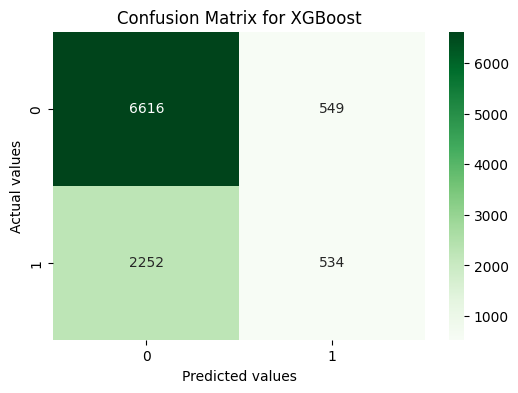

In [415]:
# Plotting confusion matrix for XGBoost regression with fulle set of features
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_full, y_pred_xgb_full ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for XGBoost')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

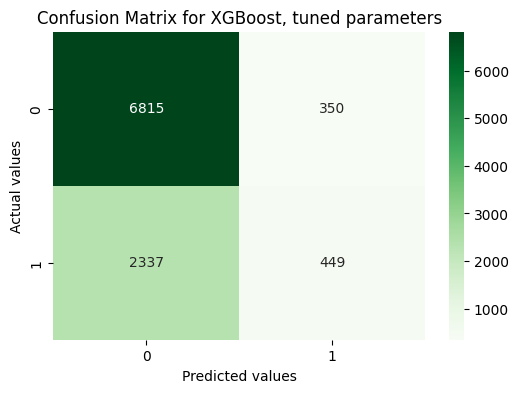

In [421]:
# Plotting confusion matrix for XGBoost with full set of features and tuned parameters
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_full, y_pred_xgb_best ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for XGBoost, tuned parameters')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

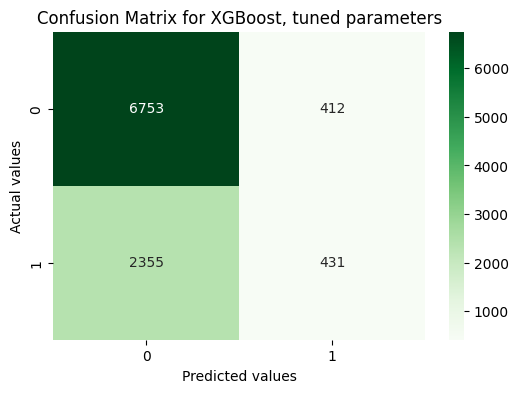

In [423]:
# Plotting confusion matrix for XGBoost with feature selection
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_s, y_pred_xgb_selection ), annot=True, fmt='d', cmap="Greens")
plt.title(f'Confusion Matrix for XGBoost, tuned parameters')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

Calculating probability of churning and offer a classification ot he churn in High, Medium, Low risk

In [ ]:
y_probabilities = best_xgb_model_1.predict_proba( X_test_full_scaled)

# The probabilities for class 1 (churn) are in the second column
churn_probabilities = y_probabilities[:, 1]
print(type(churn_probabilities))
churn_probabilities

In [ ]:
y_probabilities = best_xgb_model_1.predict_proba( X_test_full_scaled)

# The probabilities for class 1 (churn) are in the second column
churn_probabilities = y_probabilities[:, 1]
print(type(churn_probabilities))
churn_probabilities
# Define thresholds for risk levels
threshold_high = 0.6
threshold_medium = 0.4

# Categorize customers based on predicted probabilities
churn_risk_levels = np.where(churn_probabilities >= threshold_high, 'High Risk',
                              np.where(churn_probabilities >= threshold_medium, 'Medium Risk', 'Low Risk'))

# Print the counts of customers in each risk level
print("High Risk Customers:", np.sum(churn_risk_levels == 'High Risk'))
print("Medium Risk Customers:", np.sum(churn_risk_levels == 'Medium Risk'))
print("Low Risk Customers:", np.sum(churn_risk_levels == 'Low Risk'))

#### 11. Performing customer segmentation 
We could still tackle churn by single feature and segment the customers by 2 or 3 variable to define group where to act with specific initiative.<br/>
For instance the segmentation using 'Percentage Change Revenues' and 'Percentage Change Minutes' shows a category of valueable customer increasing their spending and minutes. Still there is churn among them, so we may want to run rewards in that group while we may want to run discount rates or incentive in the group that is using the service less and spending less. 

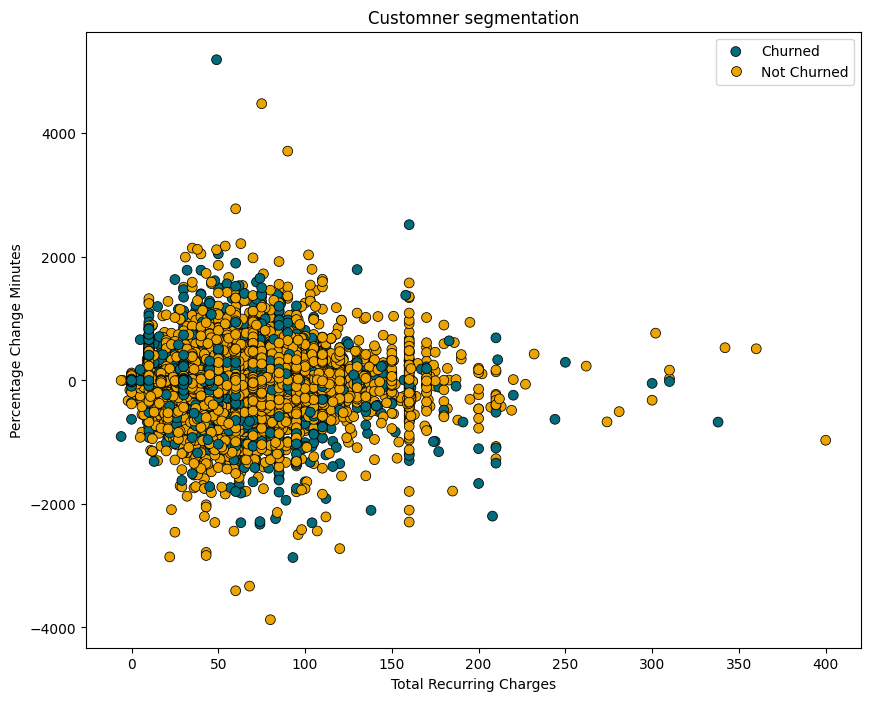

In [327]:
#VISUALING THE CLUSTERING
plt.figure(figsize=((10,8)))
sns.scatterplot(data=df,x='TotalRecurringCharge', y='PercChangeMinutes', hue='Churn', edgecolor='black', s=50, palette = palette)
plt.xlabel('Total Recurring Charges')
plt.ylabel('Percentage Change Minutes')
plt.legend(title='', labels=['Churned', 'Not Churned'])
plt.title('Customner segmentation')
plt.show()

In [279]:
# ELBOW METHOD
# Initialising an empty list for the inertia values
inertia_values=[]

# Calculating inertia values for each KMeans model number of clusters and adding it to the list
for i in range(1,11):
    km_model=KMeans(n_clusters=i, init='k-means++', max_iter=1000)
    km_model.fit(df[['TotalRecurringCharge', 'PercChangeMinutes']])
    inertia_values.append(km_model.inertia_)   

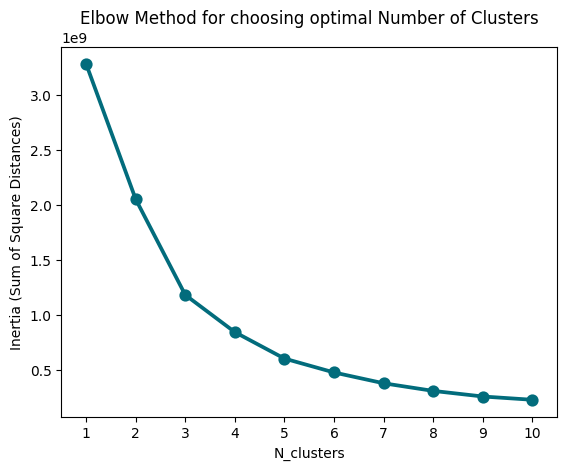

In [280]:
# ELBOW METHOD VISUALISATION
# Plotting the list with pointplot()
sns.pointplot(x=range(1,11), y=inertia_values)
plt.title('Elbow Method for choosing optimal Number of Clusters')
plt.xlabel('N_clusters')
plt.ylabel('Inertia (Sum of Square Distances)')
plt.show()

In [281]:
# INITIALISING KMeans MODEL
# The default number of clusters is 8 but with the elbow analysis I am choosing to use 6
KM_Model= KMeans(n_clusters=5, init='k-means++', max_iter=1000)

In [282]:
# FITTING THE MODEL
KM_Model.fit(df[['TotalRecurringCharge', 'PercChangeMinutes']])

KMeans(max_iter=1000, n_clusters=5)

In [297]:
# ASSIGNING CLUSTERS LABELS TO DATA SET
df['Spending and Income Cluster'] = KM_Model.labels_
print('Labels', KM_Model.labels_)
df.head()

Labels [1 3 3 ... 3 3 0]


Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0      1           24.00           219.0                  22.0   
1      1           16.99            10.0                  17.0   
2      0           38.00             8.0                  38.0   
3      0           82.28          1312.0                  75.0   
4      1           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  DroppedCalls  BlockedCalls  UnansweredCalls  \
0               -19.0           0.7           0.7              6.3   
1                 0.0           0.3           0.0              2.7   
2                 0.0           0.0           0.0              0.0   
3                 8.1          52.0           7.7             76.0   
4                -0.2           0.0           0.0              0.0   

   CustomerCareCalls  ThreewayCalls  ReceivedCalls  OutboundCalls  \
0                0.0            0.0           97.2            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.4            0.3   
3                4.3            1.3          200.3          370.3   
4                0.0            0.0            0.0            0.0   

   InboundCalls  PeakCallsInOut  OffPeakCallsInOut  DroppedBlockedCalls  \
0           0.0            58.0               24.0                  1.3   
1           0.0             5.0                1.0                  0.3   
2           0.0             1.3                3.7                  0.0   
3         147.0           555.7              303.7                 59.7   
4           0.0             0.0                0.0                  0.0   

   CallForwardingCalls  CallWaitingCalls  MonthsInService  UniqueSubs  \
0                  0.0               0.3               61           2   
1                  0.0               0.0               58           1   
2                  0.0               0.0               60           1   
3                  0.0              22.7               59           2   
4                  0.0               0.0               53           2   

   ActiveSubs  Handsets  HandsetModels  CurrentEquipmentDays  AgeHH1  AgeHH2  \
0           1       2.0            2.0                 361.0    62.0     0.0   
1           1       2.0            1.0                1504.0    40.0    42.0   
2           1       1.0            1.0                1812.0    26.0    26.0   
3           2       9.0            4.0                 458.0    30.0     0.0   
4           2       4.0            3.0                 852.0    46.0    54.0   

   ChildrenInHH  HandsetRefurbished  HandsetWebCapable  TruckOwner  RVOwner  \
0             0                   0                  1           0        0   
1             1                   0                  0           0        0   
2             1                   0                  0           0        0   
3             0                   0                  1           0        0   
4             0                   0                  0           0        0   

   Homeownership  BuysViaMailOrder  RespondsToMailOffers  OptOutMailings  \
0              1                 1                     1               0   
1              1                 1                     1               0   
2              0                 0                     0               0   
3              1                 1                     1               0   
4              1                 1                     1               0   

   N

In [285]:
df['Spending and Income Cluster'].value_counts()

Spending and Income Cluster
3    32580
0     8157
1     6722
2     1237
4     1056
Name: count, dtype: int64

In [286]:
# Group the result of value_counts() by 'Churn'
grouped_counts = df.groupby('Churn')['Spending and Income Cluster'].value_counts()

# Print the grouped counts
print(grouped_counts)

Churn  Spending and Income Cluster
0      3                              23433
       0                               6027
       1                               4500
       2                                866
       4                                681
1      3                               9147
       1                               2222
       0                               2130
       4                                375
       2                                371
Name: count, dtype: int64


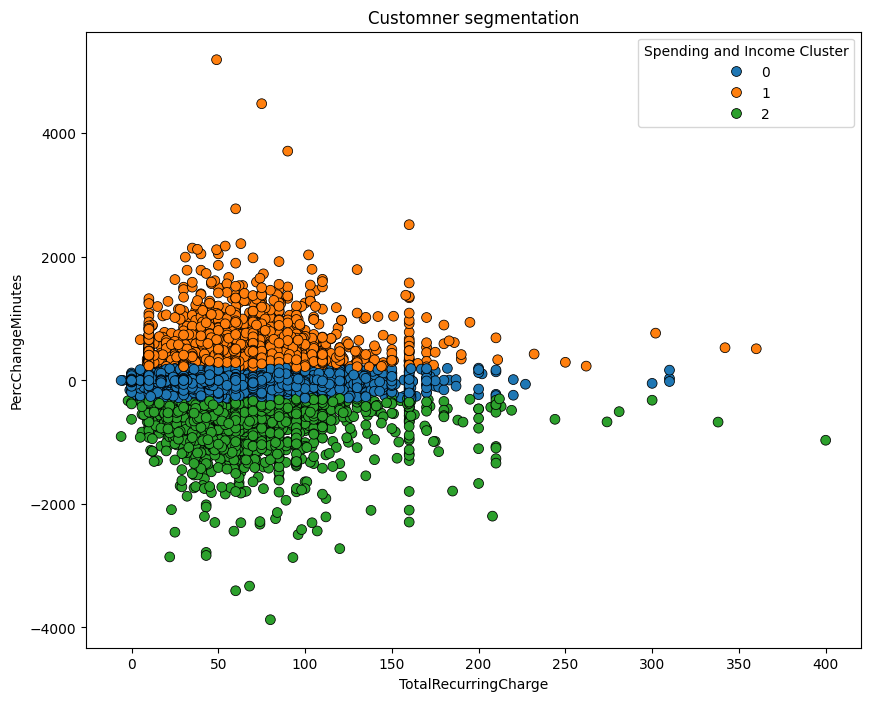

In [328]:
#VISUALING THE CLUSTERING
plt.figure(figsize=((10,8)))
sns.scatterplot(data=df,x='TotalRecurringCharge', y='PercChangeMinutes', hue='Spending and Income Cluster', edgecolor='black', s=50, palette ='tab10')
plt.xlabel('TotalRecurringCharge')
plt.ylabel('PercChangeMinutes')
plt.title('Customner segmentation')
plt.show()

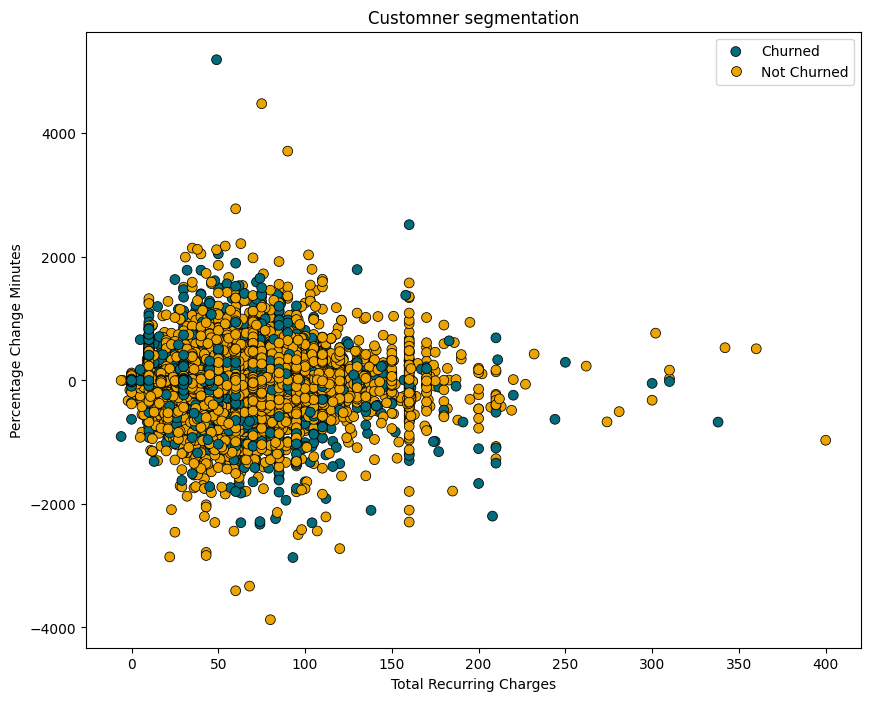

In [326]:
#VISUALING THE CLUSTERING
plt.figure(figsize=((10,8)))
sns.scatterplot(data=df,x='TotalRecurringCharge', y='PercChangeMinutes', hue='Churn', edgecolor='black', s=50, palette = palette)
plt.xlabel('Total Recurring Charges')
plt.ylabel('Percentage Change Minutes')
plt.legend(title='', labels=['Churned', 'Not Churned'])
plt.title('Customner segmentation')
plt.show()

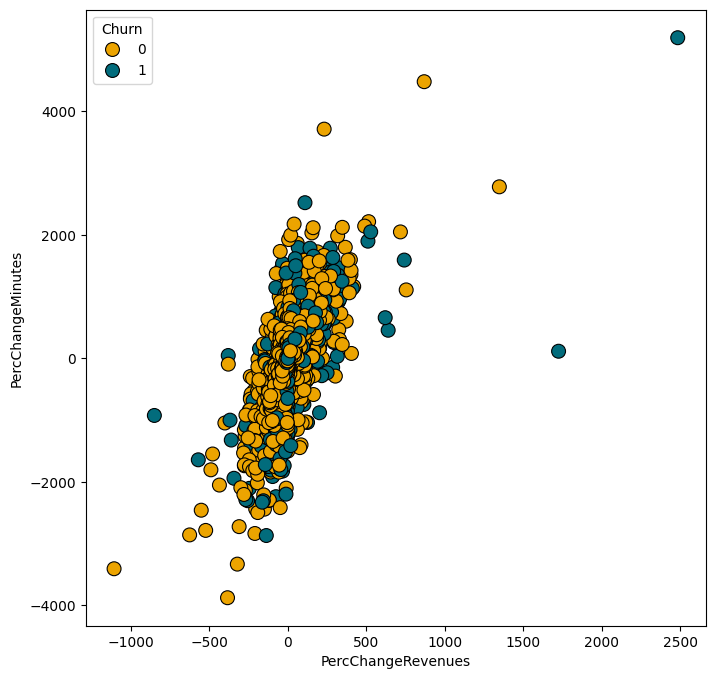

In [329]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_cell2cell, x='PercChangeRevenues', y='PercChangeMinutes', hue='Churn', s=100,  edgecolor='black', palette=palette)
plt.show()

In [291]:
# ELBOW METHOD
# Initialising an empty list for the inertia values
inertia_values=[]

# Calculating inertia values for each KMeans model number of clusters and adding it to the list
for i in range(1,11):
    km_model=KMeans(n_clusters=i, init='k-means++', max_iter=1000)
    km_model.fit(df[['PercChangeRevenues', 'PercChangeMinutes']])
    inertia_values.append(km_model.inertia_)   

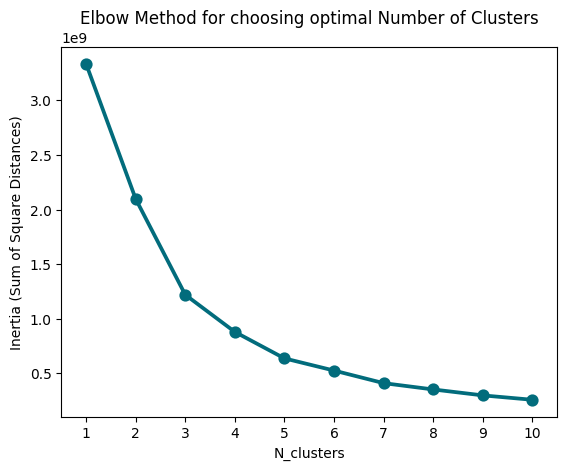

In [292]:
# ELBOW METHOD VISUALISATION
# Plotting the list with pointplot()
sns.pointplot(x=range(1,11), y=inertia_values)
plt.title('Elbow Method for choosing optimal Number of Clusters')
plt.xlabel('N_clusters')
plt.ylabel('Inertia (Sum of Square Distances)')
plt.show()

In [302]:
# INITIALISING KMeans MODEL
# The default number of clusters is 8 but with the elbow analysis I am choosing to use 6
KM_Model_2= KMeans(n_clusters=3, init='k-means++', max_iter=1000)

In [303]:
# FITTING THE MODEL
KM_Model_2.fit(df[['PercChangeRevenues', 'PercChangeMinutes']])

KMeans(max_iter=1000, n_clusters=3)

In [304]:
# ASSIGNING CLUSTERS LABELS TO DATA SET
df['Spending and Income Cluster'] = KM_Model_2.labels_
print('Labels', KM_Model_2.labels_)
df.head()

Labels [0 0 0 ... 0 0 0]


Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0      1           24.00           219.0                  22.0   
1      1           16.99            10.0                  17.0   
2      0           38.00             8.0                  38.0   
3      0           82.28          1312.0                  75.0   
4      1           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  DroppedCalls  BlockedCalls  UnansweredCalls  \
0               -19.0           0.7           0.7              6.3   
1                 0.0           0.3           0.0              2.7   
2                 0.0           0.0           0.0              0.0   
3                 8.1          52.0           7.7             76.0   
4                -0.2           0.0           0.0              0.0   

   CustomerCareCalls  ThreewayCalls  ReceivedCalls  OutboundCalls  \
0                0.0            0.0           97.2            0.0   
1                0.0            0.0            0.0            0.0   
2                0.0            0.0            0.4            0.3   
3                4.3            1.3          200.3          370.3   
4                0.0            0.0            0.0            0.0   

   InboundCalls  PeakCallsInOut  OffPeakCallsInOut  DroppedBlockedCalls  \
0           0.0            58.0               24.0                  1.3   
1           0.0             5.0                1.0                  0.3   
2           0.0             1.3                3.7                  0.0   
3         147.0           555.7              303.7                 59.7   
4           0.0             0.0                0.0                  0.0   

   CallForwardingCalls  CallWaitingCalls  MonthsInService  UniqueSubs  \
0                  0.0               0.3               61           2   
1                  0.0               0.0               58           1   
2                  0.0               0.0               60           1   
3                  0.0              22.7               59           2   
4                  0.0               0.0               53           2   

   ActiveSubs  Handsets  HandsetModels  CurrentEquipmentDays  AgeHH1  AgeHH2  \
0           1       2.0            2.0                 361.0    62.0     0.0   
1           1       2.0            1.0                1504.0    40.0    42.0   
2           1       1.0            1.0                1812.0    26.0    26.0   
3           2       9.0            4.0                 458.0    30.0     0.0   
4           2       4.0            3.0                 852.0    46.0    54.0   

   ChildrenInHH  HandsetRefurbished  HandsetWebCapable  TruckOwner  RVOwner  \
0             0                   0                  1           0        0   
1             1                   0                  0           0        0   
2             1                   0                  0           0        0   
3             0                   0                  1           0        0   
4             0                   0                  0           0        0   

   Homeownership  BuysViaMailOrder  RespondsToMailOffers  OptOutMailings  \
0              1                 1                     1               0   
1              1                 1                     1               0   
2              0                 0                     0               0   
3              1                 1                     1               0   
4              1                 1                     1               0   

   N

In [305]:
# Group the result of value_counts() by 'Churn'
grouped_counts = df.groupby('Churn')['Spending and Income Cluster'].value_counts()

# Print the grouped counts
print(grouped_counts)

Churn  Spending and Income Cluster
0      0                              29582
       1                               3515
       2                               2410
1      0                              11664
       1                               1346
       2                               1235
Name: count, dtype: int64


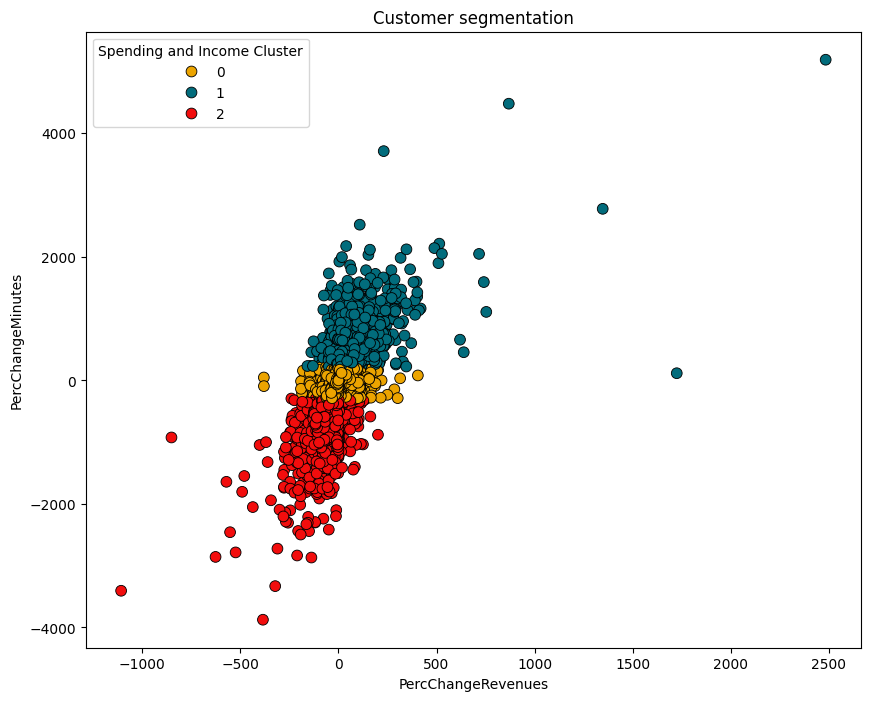

In [325]:
#VISUALING THE CLUSTERING
plt.figure(figsize=((10,8)))
sns.scatterplot(data=df,x='PercChangeRevenues', y='PercChangeMinutes', hue='Spending and Income Cluster', edgecolor='black', s=60, palette = palette)
plt.xlabel('Percentage Change Revenues')
plt.ylabel('Percentage Change Minutes')
plt.title('Customer segmentation')
plt.show()

#### 12. Models evaluation recap
Which factors are we using for evaluating and why

#### 13. Conclusions
##### Useful insights for marketing to understand what a churned customer means within our business

* The churn rate in our company calculated on the base of the given data is 28.6%. This is in line with the industry (ranging from 25% to 30%) so we are starting from a decent point, even if we all know that fine tuning a success could be more challenging and draining than improving a slaggish situation. The finance department and the board has identify a reduction of 3% in the next 12 months as a significant an welcomed success that would bring us on the leader side of the sector, with increased profits and improved brand strenght. To give a real taste of what this means in terms of retented customers, on this data set would signify to manage to keep with us and extra ~430 customers.

* Churn rate is mostly omogeneous across the data set, meaning there are no features incredibly effecting it and the distribution of the churn follow the one of the feature as we can see from the distribution plots. On thing that we must notice is how skewed are the feature on the right. What we decided to do is to investigate those ouliers and find any useful insight.

* Churn is very entangled in the data, making customer segmentation not the most efficient tool to adress it as we can see from the scatter plots. Considering though some of the most relevant feature we can still group customers in order to create specific action. For instance the segmentation using 'Percentage Change Revenues' and 'Percentage Change Minutes' shows a category of valueable customer increasing their spending and minutes. Still there is churn among them, so we may want to run rewards in that group while we may want to run discount rates or incentive in the group that is using the service less and spending less.  

* Useful insights for marketing
* Deployment of model as app available to marketing team

#### 14. Saving the model

In [154]:
import pickle
# save the model
with open('churn_model.pkl', 'wb') as file:
    pickle.dump(xgb_selection, file)

In [425]:
# import pickle
# # save the model to disk
# filename = 'churn_risk_prediction.sav'
# pickle.dump(xgb_selection, open(filename, 'wb'))

In [427]:
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test_s, y_test_s)
# print(result)

0.7181187820319566
